# Predicting Financial Market

- In this exercise, we use non-parametric methods such as decision trees and random forests as well as neural networks to predict financial market data, and compare the results with time series models in econometrics.

- The data used includes the main stock indices and macroeconomic indicators of the US financial market over the past 23 years.

- The observation frequency of the data is the daily closing price.

In [1]:
!pip install yfinance
import yfinance as yf
import datetime
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller

def download_data(symbols, features, start_date, end_date, interval):
    # Download the data using yfinance
    data = yf.download(symbols, start=start_date, end=end_date, interval=interval)
    data.dropna(inplace=True)
    return data[features]

syms = ['^IXIC','^GSPC','^TNX',"DX-Y.NYB","^DJI", 'CL=F', '^RUT', "HG=F", "^vix"]
features = ['Close', 'Open', 'High', 'Low', 'Volume']
df = download_data(syms, features, '1990-01-01', '2025-03-19', '1d')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp310-cp310-linux_x86_64.whl size=317977 sha256=2e16d4415420d83d9575ce2f8debf93c359765145f557eaa1ebfe07acc64a76e
  Stored in directory: /root/.cache/pip/wheels/fd/fd/5e/90b9ec95da4fd6c96237b580ce74f89d6bdea547ad151ab5f4
Successfully built peewee
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  9 of 9 completed


In [2]:
len(df)

6150

In [4]:
df.tail()

Price           Close                                                 \
Ticker           CL=F    DX-Y.NYB    HG=F          ^DJI        ^GSPC   
Date                                                                   
2025-03-12  67.680000  103.610001  4.8210  41350.929688  5599.299805   
2025-03-13  66.550003  103.830002  4.8985  40813.570312  5521.520020   
2025-03-14  67.180000  103.720001  4.8695  41488.191406  5638.939941   
2025-03-17  67.580002  103.370003  4.9335  41841.628906  5675.120117   
2025-03-18  66.900002  103.239998  4.9930  41581.308594  5614.660156   

Price                                                         Open  ...  \
Ticker             ^IXIC         ^RUT   ^TNX       ^VIX       CL=F  ...   
Date                                                                ...   
2025-03-12  17648.449219  2026.469971  4.318  24.230000  66.620003  ...   
2025-03-13  17303.009766  1993.689941  4.274  24.660000  67.690002  ...   
2025-03-14  17754.089844  2044.099976  4.308  21.770000  66.779999  ...   
2025-03-17  17808.660156  2068.330078  4.306  20.510000  67.349998  ...   
2025-03-18  17504.119141  2049.939941  4.281  21.700001  67.400002  ...   

Price             Low    Volume                                             \
Ticker           ^VIX      CL=F DX-Y.NYB   HG=F         ^DJI         ^GSPC   
Date                                                                         
2025-03-12  23.889999  246675.0      0.0  649.0  712360000.0  5.219830e+09   
2025-03-13  23.459999  268590.0      0.0  776.0  646770000.0  5.018980e+09   
2025-03-14  21.480000  180495.0      0.0  394.0  600240000.0  4.863180e+09   
2025-03-17  20.320000  161298.0      0.0  528.0  564190000.0  5.031770e+09   
2025-03-18  20.410000  110338.0      0.0  424.0  569810000.0  4.666270e+09   

Price                                             
Ticker             ^IXIC          ^RUT ^TNX ^VIX  
Date                                              
2025-03-12  7.746430e+09  5.219830e+09  0.0  0.0  
2025-03-13  7.147050e+09  5.018980e+09  0.0  0.0  
2025-03-14  7.093850e+09  4.863180e+09  0.0  0.0  
2025-03-17  6.306340e+09  5.031770e+09  0.0  0.0  
2025-03-18  6.450530e+09  4.666270e+09  0.0  0.0  

[5 rows x 45 columns]

In [3]:
df['Close'].to_csv('/kaggle/working/marketdata.csv') 


### load data and import packages

In [4]:

import os
import datetime
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller


def read_csv_space(path, file):
    return pd.read_csv(os.path.join(path, file), encoding='', sep='\s+', index_col=False, engine='python') 

def read_csv_comma(path, file):
    return pd.read_csv(os.path.join(path, file), encoding='', sep=',', engine='python') 

close_prices = read_csv_comma('/kaggle/working', 'marketdata.csv')
close_prices.set_index(close_prices['Date'], inplace=True)
close_prices.drop(columns =['Date'], inplace=True)


In [5]:
close_prices

CL=F    DX-Y.NYB    HG=F          ^DJI        ^GSPC  \
Date                                                                   
2000-08-30  33.400002  112.139999  0.8850  11103.009766  1502.589966   
2000-08-31  33.099998  112.599998  0.8850  11215.099609  1517.680054   
2000-09-01  33.380001  111.419998  0.8890  11238.780273  1520.770020   
2000-09-05  33.799999  112.410004  0.9060  11260.610352  1507.079956   
2000-09-06  34.950001  114.120003  0.9015  11310.639648  1492.250000   
...               ...         ...     ...           ...          ...   
2024-05-16  79.230003  104.459999  4.8920  39869.378906  5297.100098   
2024-05-17  80.059998  104.449997  5.0570  40003.589844  5303.270020   
2024-05-20  79.800003  104.570000  5.0875  39806.769531  5308.129883   
2024-05-21  79.260002  104.660004  5.1190  39872.988281  5321.410156   
2024-05-22  77.570000  104.940002  4.8675  39671.039062  5307.009766   

                   ^IXIC         ^RUT   ^TNX       ^VIX  
Date                                                     
2000-08-30   4103.810059   532.330017  5.800  17.690001  
2000-08-31   4206.350098   537.890015  5.729  16.840000  
2000-09-01   4234.330078   541.909973  5.675  17.530001  
2000-09-05   4143.180176   539.020020  5.683  19.820000  
2000-09-06   4013.340088   536.320007  5.712  20.790001  
...                  ...          ...    ...        ...  
2024-05-16  16698.320312  2096.250000  4.377  12.420000  
2024-05-17  16685.970703  2095.719971  4.420  11.990000  
2024-05-20  16794.869141  2102.500000  4.437  12.150000  
2024-05-21  16832.619141  2098.360107  4.414  11.860000  
2024-05-22  16801.539062  2081.709961  4.434  12.290000  

[5946 rows x 9 columns]

- The data we used covers the time range from September 1, 2000, to October 19, 2023, including the daily closing prices of nine financial market indices.

- CL=F is the crude oil futures price.
- DX-Y.NYB is the US dollar index.
- HG=F is the copper futures price.
- ^DJI is the Dow Jones Industrial Average (30 stocks).
- ^GSPC is the S&P 500 index.
- ^IXIC is the NASDAQ 100 index.
- ^RUT is the Russell 2000 index.
- ^TNX is the yield on the US 10-year Treasury note.
- ^VIX is the financial market's volatility index, often referred to as the fear index.

### Stationarity in Time Series

- Time series data differ from cross-sectional data, as the assumption of independent and identically distributed (i.i.d.) does not apply here because the data are correlated over time.
- Furthermore, time series used in economic analysis often exhibit trends, making data collected at different time points incomparable. Strictly speaking, data collected at different time points in such cases come from different probability distributions.
- Statistical models or machine learning algorithms for time series analysis require the series to be stationary.
- Below is the strict definition of stationarity in time series:
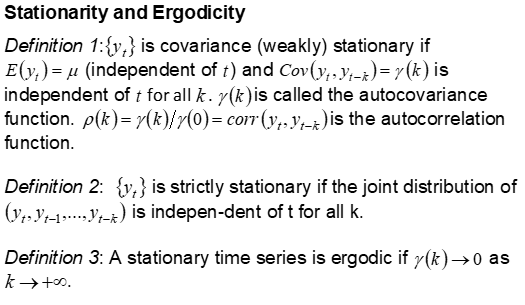

- Intuitively, for a time series to be suitable for statistical analysis, its distribution (at least the mean and variance-covariance) must not change over time.

### Checking if a time series is stationary by plotting

- The simplest way to check if a time series is stationary is to plot it.
- We use the following code to plot each of the nine series in the data.

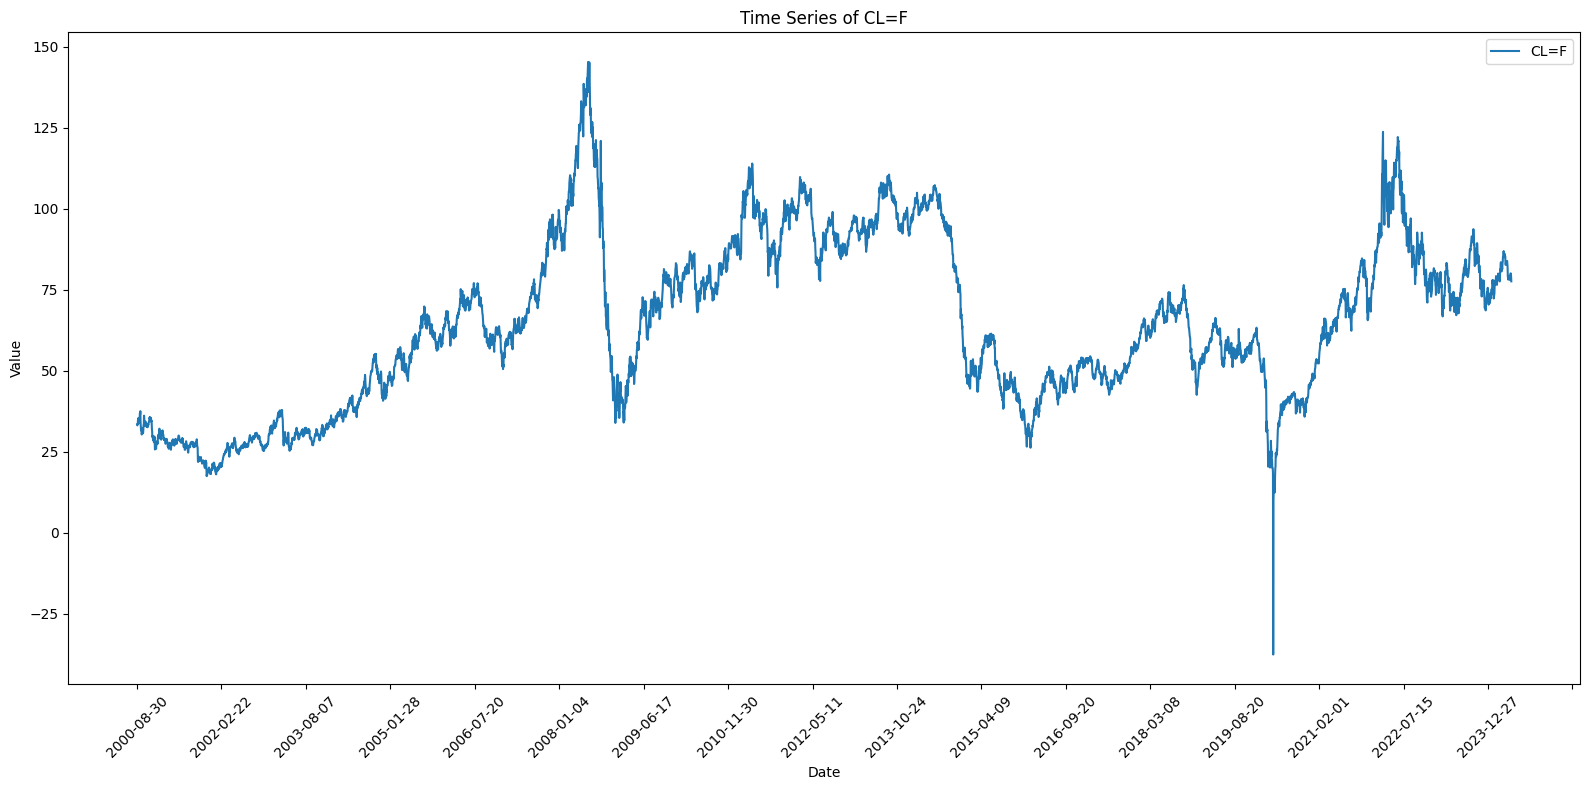

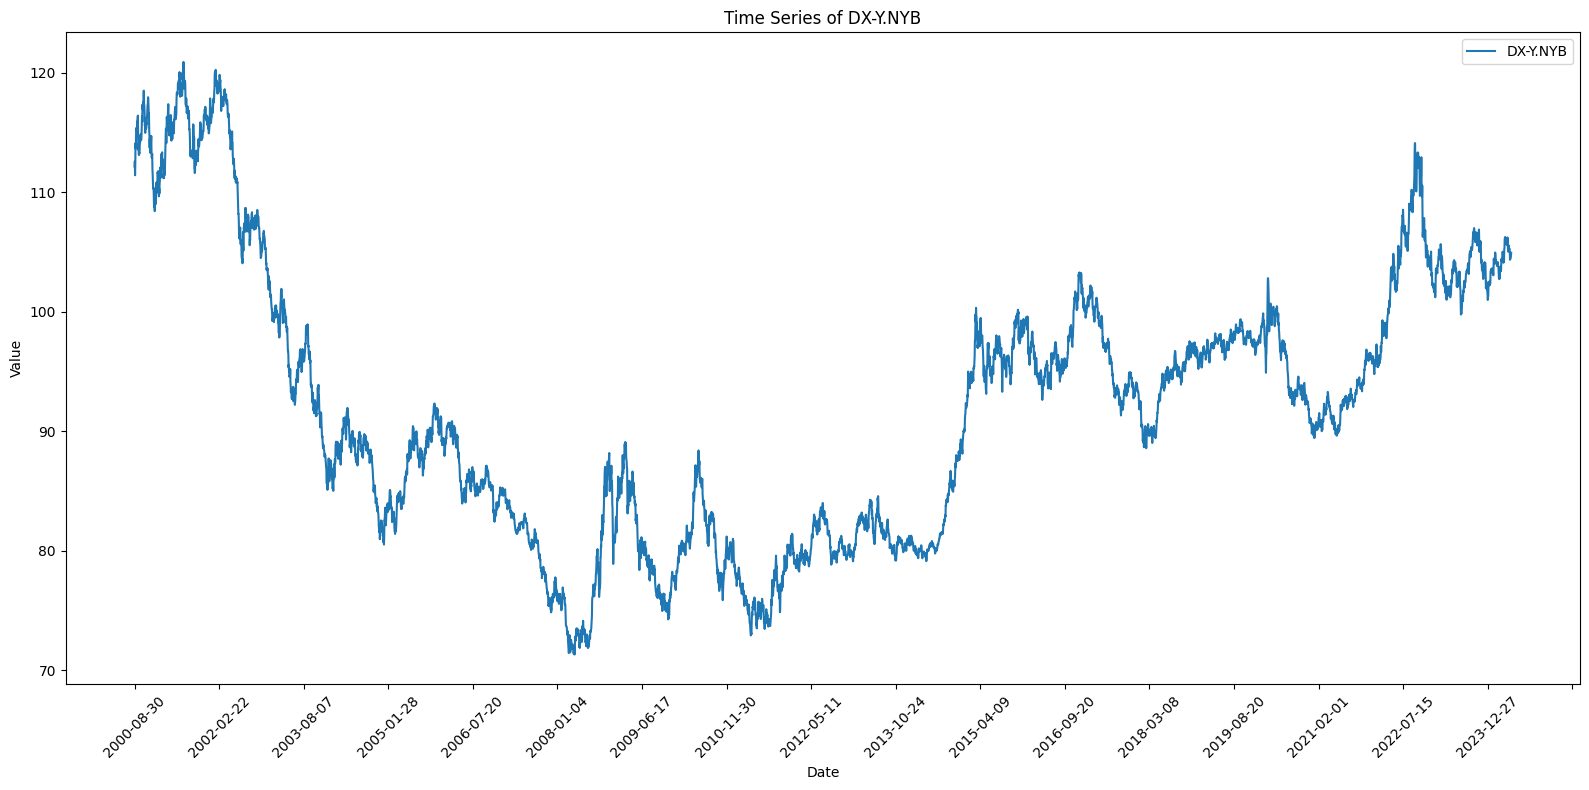

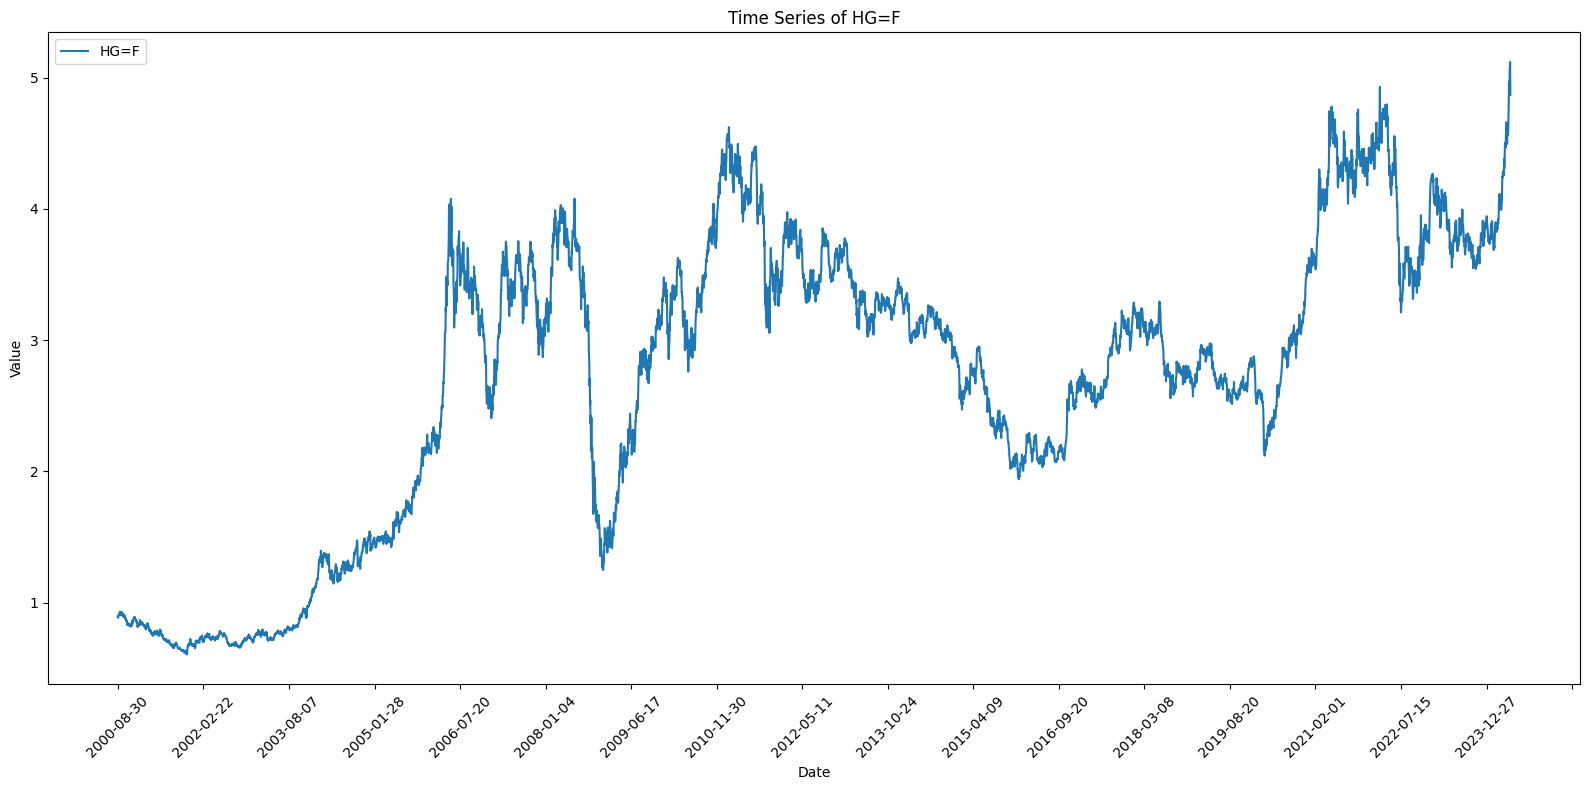

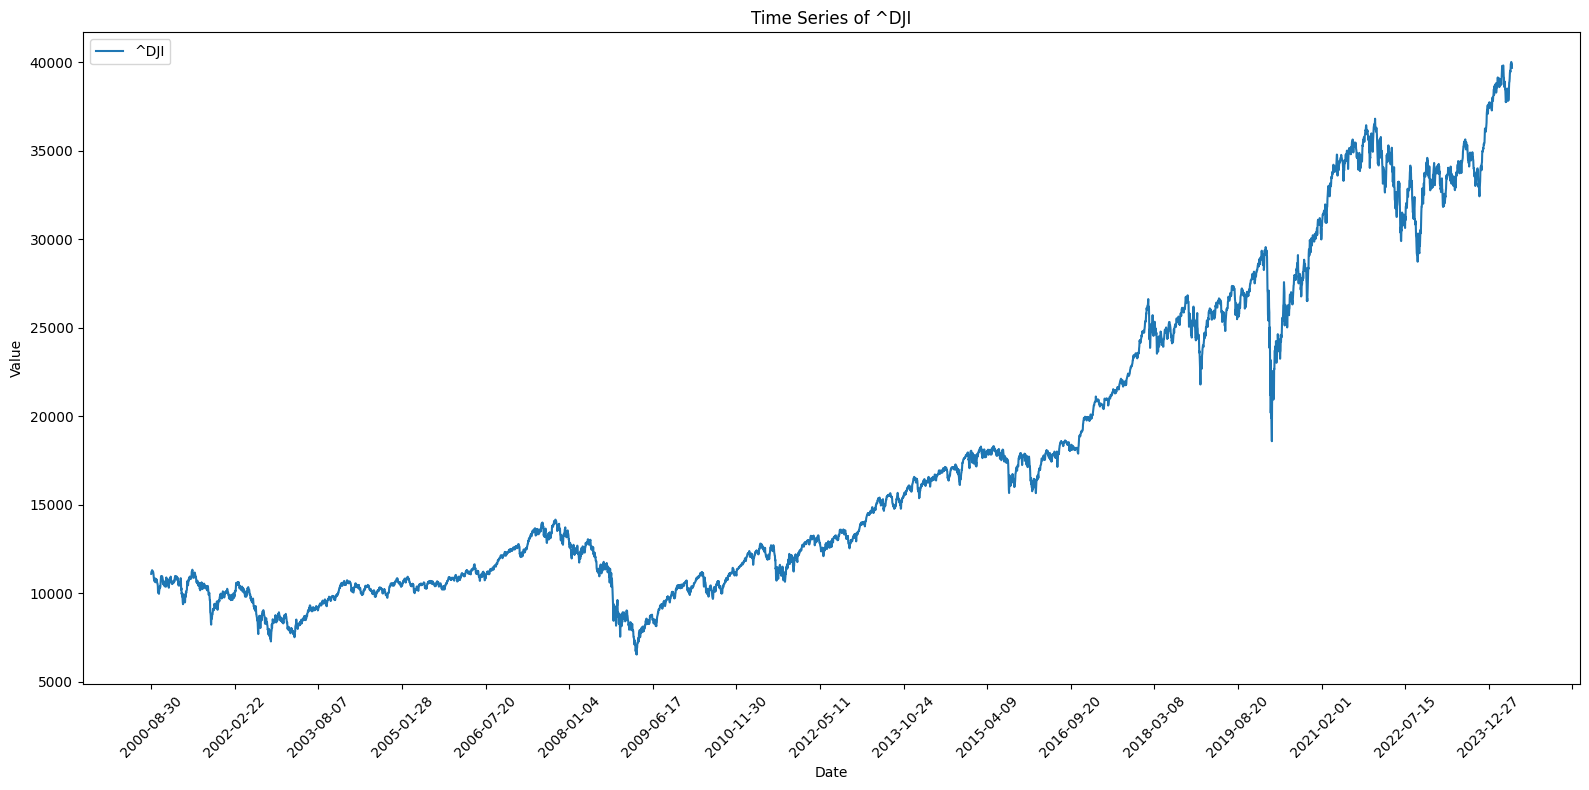

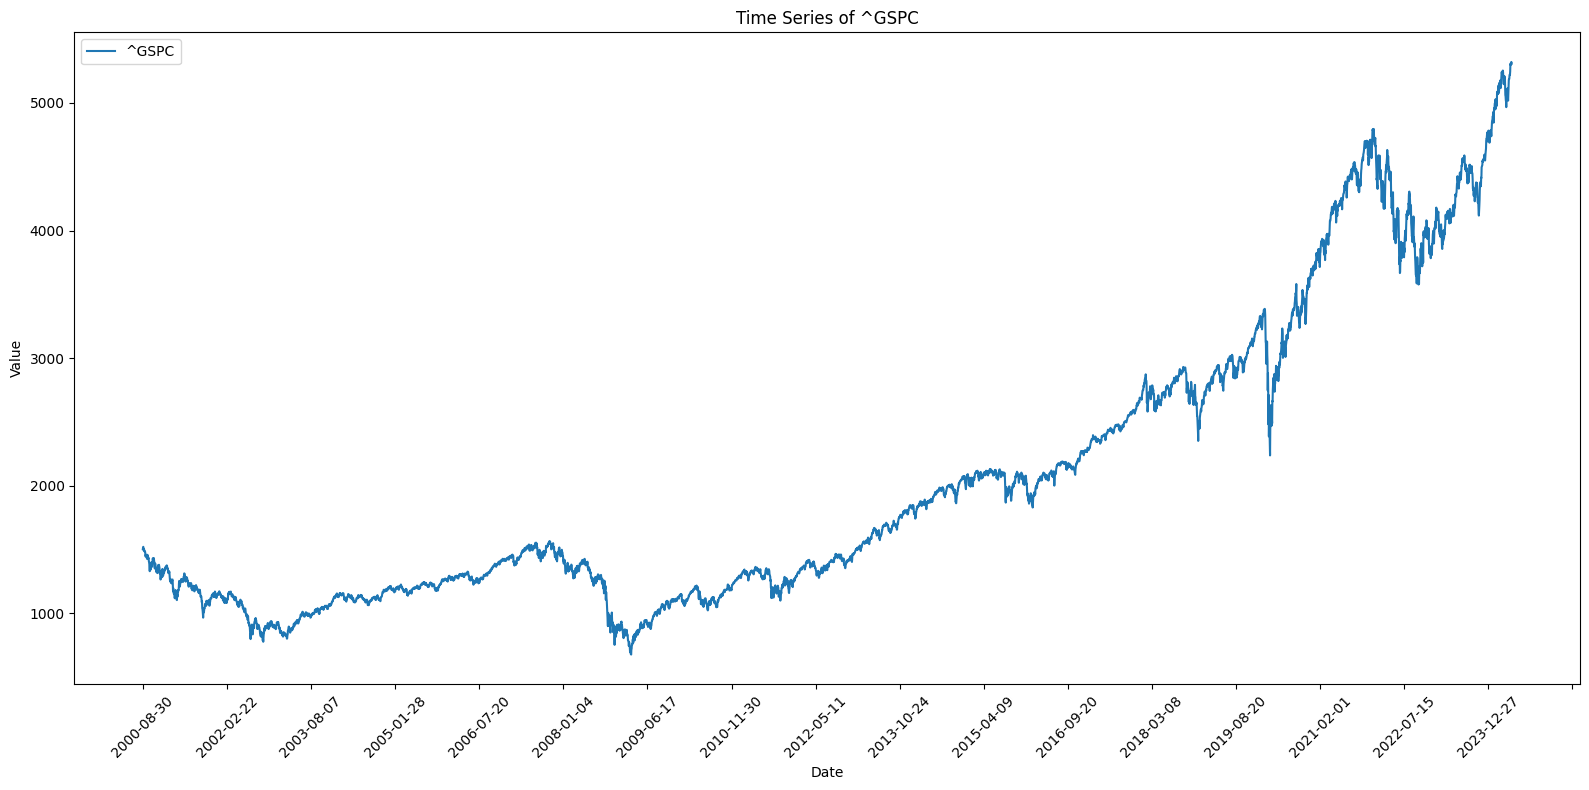

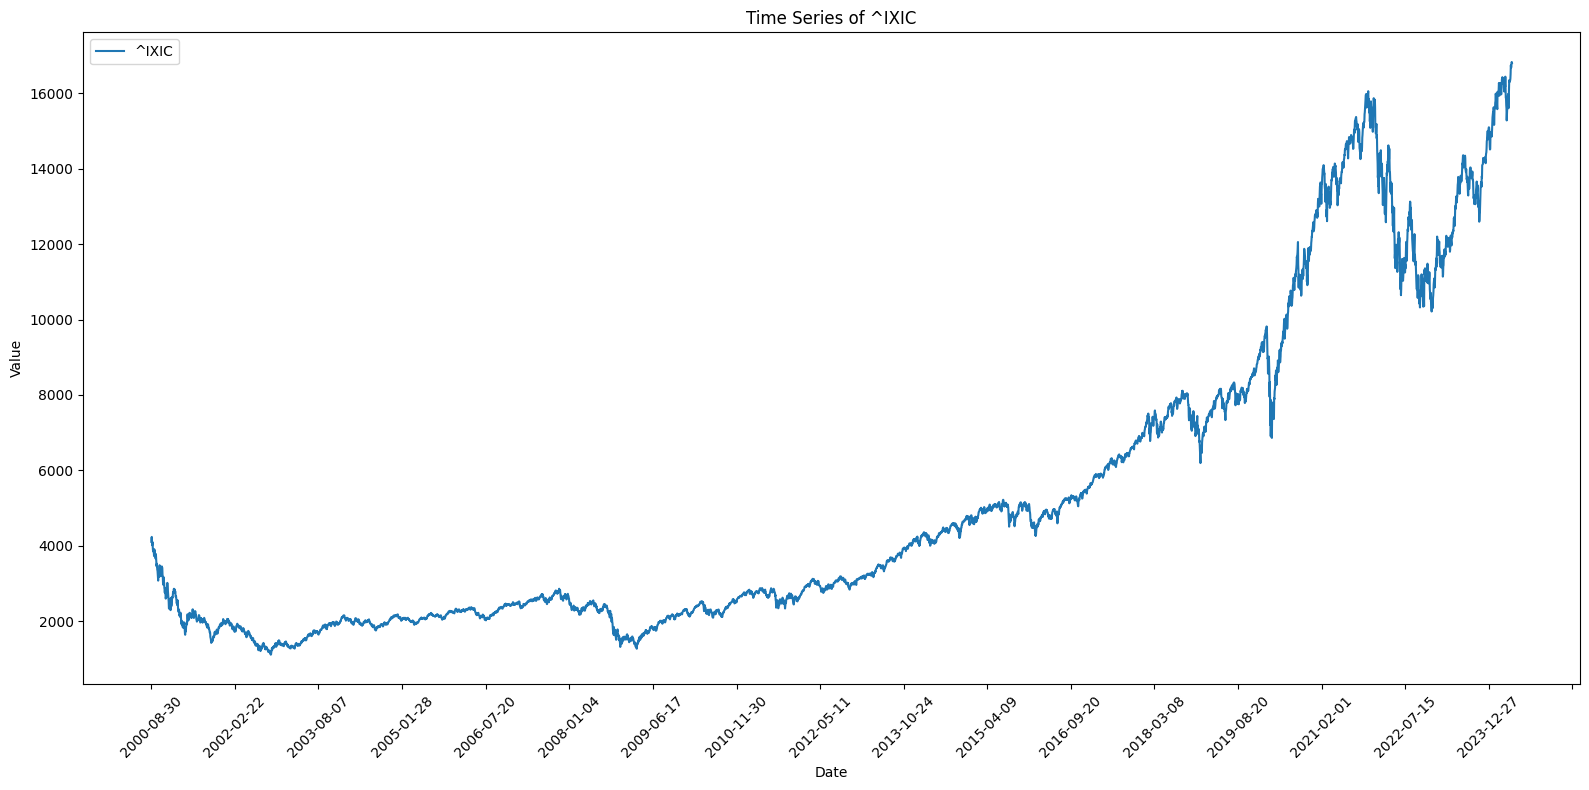

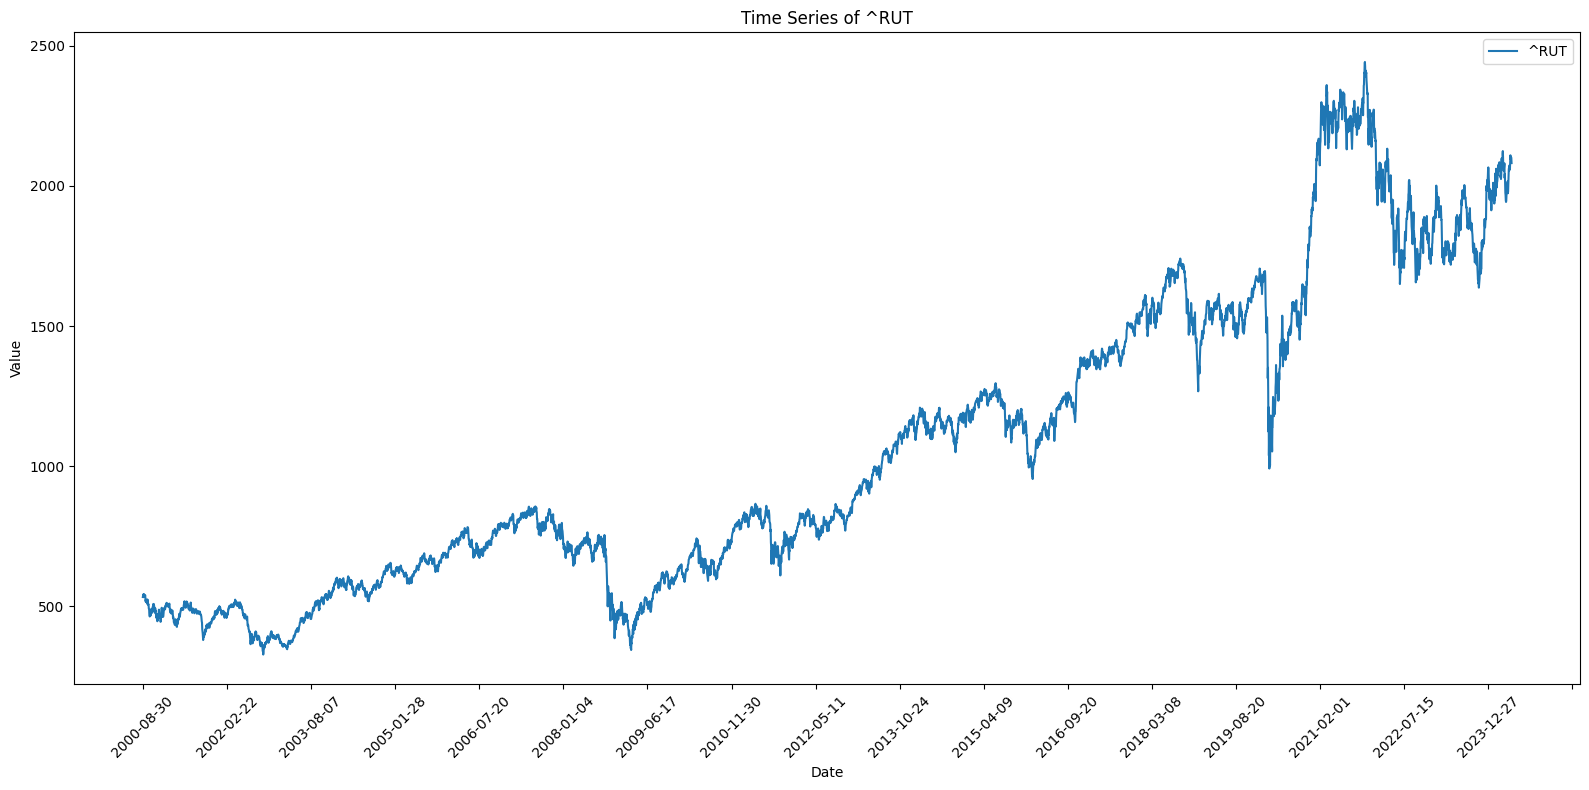

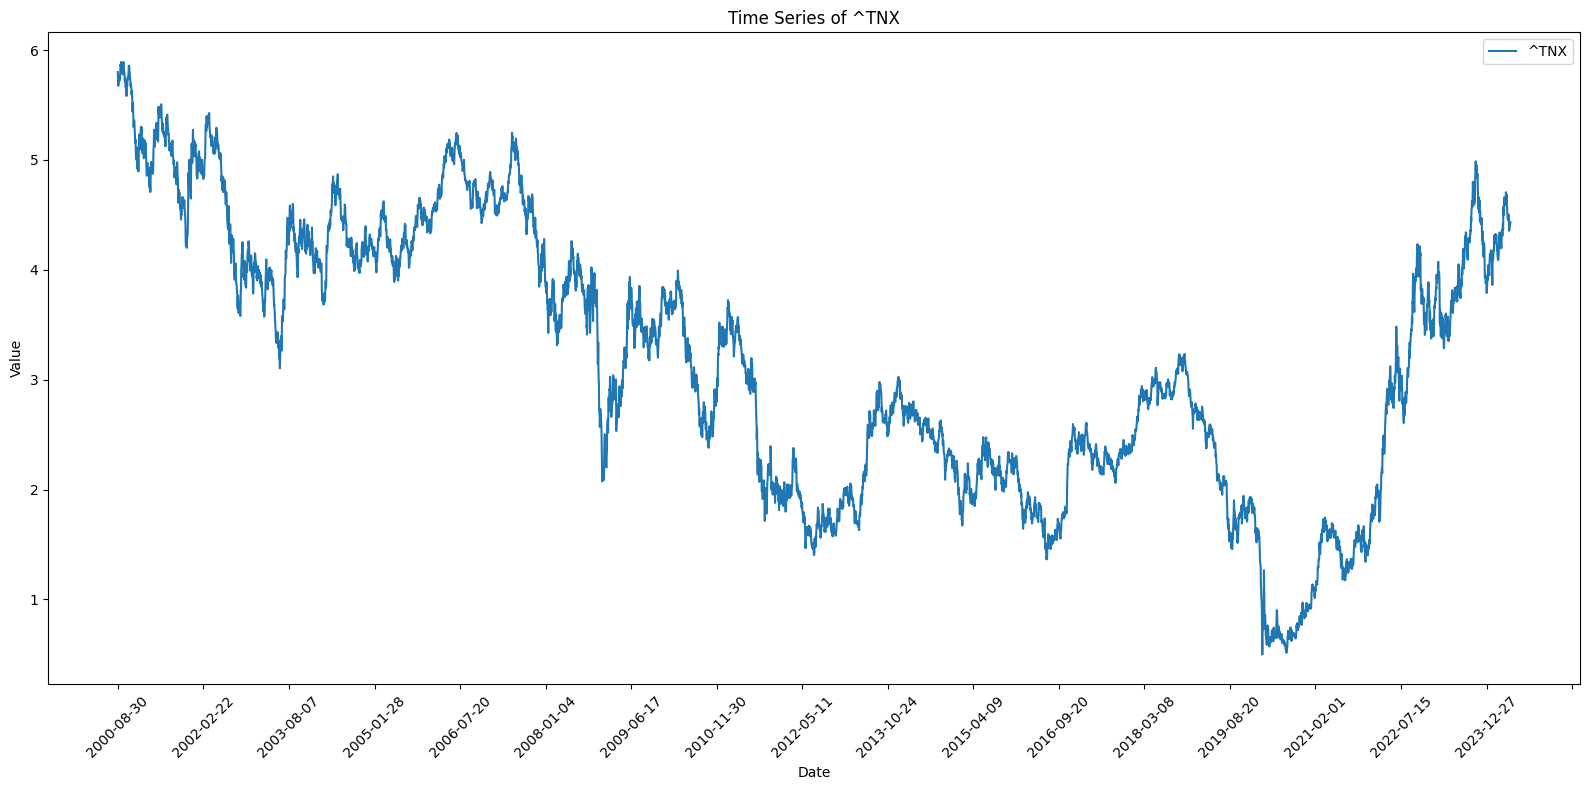

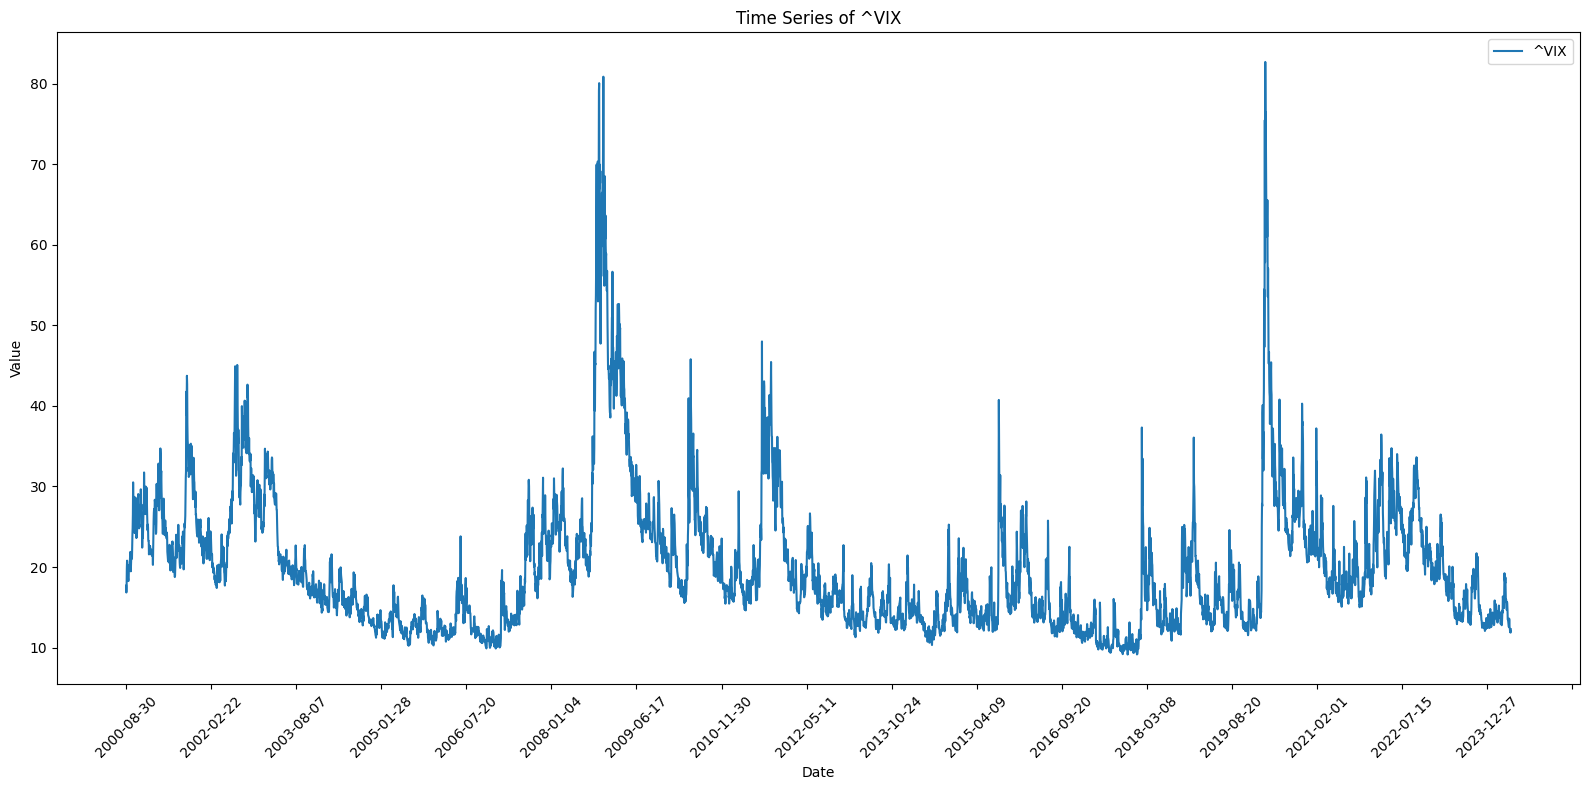

In [6]:
def plot_series(series, label, size=(16,8)):
    # Create the plot
    fig, ax = plt.subplots(figsize=size)
    ax.plot(series.index, series.values, label=label)

    # Format the x-axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=45)

    # Add title, labels, and a legend
    plt.title("Time Series of {}".format(label))
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()

    # Display the graph
    plt.tight_layout()
    plt.show()

for col in close_prices.columns:
    plot_series(close_prices[col], '{}'.format(col))


- As shown in the above figure, except for ^VIX, the other eight indices all exhibit clear time trends. For example, the Nasdaq index has increased significantly over the past 20 years, and its current index value is completely different from the average value 20 years ago.

- Besides plotting, a more rigorous method of checking is to use statistical hypothesis testing. The most commonly used hypothesis testing method is the Augmented Dickey-Fuller Test (ADF).

- Below is the Python code for executing the ADF test.

In [7]:
non_stationary_series = []
for col in close_prices.columns:
    result = adfuller(close_prices[col])
    print('ADF Statistic of {}:'.format(col), result[0])
    print('p-value of {}:'.format(col), result[1])
    print('Critical Values of {}:'.format(col), result[4])
    if result[0] >= result[4]['5%']: # cannot reject the null, therefore the series is likely to be nonstaionary.
        non_stationary_series.append(col)
    

ADF Statistic of CL=F: -2.760879573045273
p-value of CL=F: 0.06408277016554961
Critical Values of CL=F: {'1%': -3.431455838346806, '5%': -2.8620286776251365, '10%': -2.567030120827259}
ADF Statistic of DX-Y.NYB: -1.9627362551973269
p-value of DX-Y.NYB: 0.3031470587230499
Critical Values of DX-Y.NYB: {'1%': -3.431453971458659, '5%': -2.862027852787503, '10%': -2.567029681743642}
ADF Statistic of HG=F: -1.6136303379588117
p-value of HG=F: 0.4760702068250404
Critical Values of HG=F: {'1%': -3.431453412620756, '5%': -2.8620276058789127, '10%': -2.5670295503074683}
ADF Statistic of ^DJI: 1.2456469407876203
p-value of ^DJI: 0.9962865734129591
Critical Values of ^DJI: {'1%': -3.4314562124823786, '5%': -2.862028842927479, '10%': -2.5670302088222248}
ADF Statistic of ^GSPC: 2.113157249738097
p-value of ^GSPC: 0.9988030956142977
Critical Values of ^GSPC: {'1%': -3.4314562124823786, '5%': -2.862028842927479, '10%': -2.5670302088222248}
ADF Statistic of ^IXIC: 1.8871271036384225
p-value of ^IXIC: 

In [8]:
non_stationary_series

['CL=F', 'DX-Y.NYB', 'HG=F', '^DJI', '^GSPC', '^IXIC', '^RUT', '^TNX']

The results of the hypothesis testing are consistent with the intuition gained from plotting: except for ^VIX, the other series are not stationary.

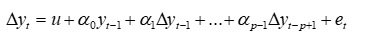- Non-stationary time series typically include several scenarios:

- Time series with deterministic time trends or seasonality, i.e., the time series is a function of time trends or seasons. This situation can be transformed into a stationary series through de-trending or de-seasonalizing.

- Unit roots. A special case of unit roots is a random walk, i.e., $y_t = y_{t-1} + \epsilon_t$.  . Such series can exhibit a random time trend that is unstable and can change randomly. For example, stock prices can continuously rise or fall for a period, but this trend can change randomly.

- The ADF test is based on the following regression model, where $\Delta$ represents the first difference.

- Non-stationary time series with obvious time trends can generally be identified by plotting. Non-stationary time series that are difficult to identify by plotting are those with a unit root, a simple example being a random walk $y_t = y_{t-1} + \epsilon_t$. Testing whether a time series is stationary focuses on whether the series has a unit root.

- The intuition behind the ADF test is that if a time series has a Unit Root, its first difference will be a stationary series. For example, for a random walk series $y_t = y_{t-1} + \epsilon_t$, its first difference is $\Delta y_t = y_t - y_{t-1}=\epsilon_t$. The focus in the unit root test using the following regression model is on $\alpha_0$. Under the null hypothesis that a time series has a unit root, this regression coefficient is zero (meaning its first difference is a stationary series); otherwise, it is less than zero.

- If the null hypothesis cannot be rejected in the hypothesis test, there is some evidence to suggest that a time series has a unit root, thereby being non-stationary. 


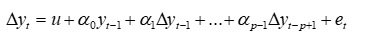
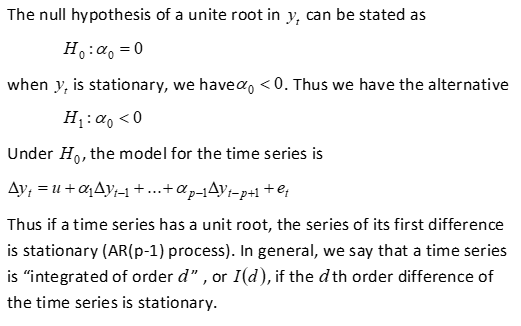

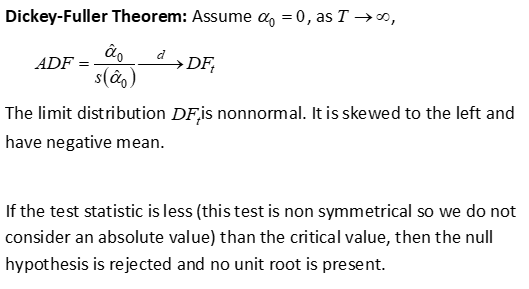

#### To stationarize a non-stationary time series, the first step is to transform it into a stationary series. One common method to achieve this is through differencing:

First-order differencing involves subtracting the current value of the time series from the previous value. This process can help to remove trends or seasonality and make the series more stationary.
The formula for first-order differencing is given by

$\Delta y_t = y_t - y_{t-1}$

In [9]:
data_diff = close_prices.copy()
for col in non_stationary_series:
    data_diff[col] = close_prices[col].diff()

data_diff=data_diff.dropna()
for col in close_prices.columns:
    result = adfuller(data_diff[col])
    print('ADF Statistic of {}:'.format(col), result[0])
    print('p-value of {}:'.format(col), result[1])
    print('Critical Values of {}:'.format(col), result[4])
    if result[0] >= result[4]['5%']: # cannot reject the null, therefore the series is likely to be nonstaionary.
        print('{} is still nonstationary'.format(col))
    

ADF Statistic of CL=F: -12.6783542837291
p-value of CL=F: 1.2020160167238195e-23
Critical Values of CL=F: {'1%': -3.431455838346806, '5%': -2.8620286776251365, '10%': -2.567030120827259}
ADF Statistic of DX-Y.NYB: -23.50530935474869
p-value of DX-Y.NYB: 0.0
Critical Values of DX-Y.NYB: {'1%': -3.43145248248047, '5%': -2.862027194919521, '10%': -2.5670293315425985}
ADF Statistic of HG=F: -17.787009129311702
p-value of HG=F: 3.259140776838516e-30
Critical Values of HG=F: {'1%': -3.431453412620756, '5%': -2.8620276058789127, '10%': -2.5670295503074683}
ADF Statistic of ^DJI: -15.790917623988202
p-value of ^DJI: 1.1024723960082214e-28
Critical Values of ^DJI: {'1%': -3.4314562124823786, '5%': -2.862028842927479, '10%': -2.5670302088222248}
ADF Statistic of ^GSPC: -15.293677384065017
p-value of ^GSPC: 4.407980353760307e-28
Critical Values of ^GSPC: {'1%': -3.4314560253829525, '5%': -2.8620287602623313, '10%': -2.567030164817301}
ADF Statistic of ^IXIC: -14.315440393484424
p-value of ^IXIC: 

In [10]:
data_diff


CL=F  DX-Y.NYB    HG=F        ^DJI      ^GSPC       ^IXIC  \
Date                                                                        
2000-08-31 -0.300003  0.459999  0.0000  112.089844  15.090088  102.540039   
2000-09-01  0.280003 -1.180000  0.0040   23.680664   3.089966   27.979980   
2000-09-05  0.419998  0.990005  0.0170   21.830078 -13.690063  -91.149902   
2000-09-06  1.150002  1.709999 -0.0045   50.029297 -14.829956 -129.840088   
2000-09-07  0.380001 -0.470001  0.0045  -50.769531  10.260010   85.010010   
...              ...       ...     ...         ...        ...         ...   
2024-05-16  0.600006  0.110001 -0.0775  -38.621094 -11.049805  -44.070312   
2024-05-17  0.829994 -0.010002  0.1650  134.210938   6.169922  -12.349609   
2024-05-20 -0.259995  0.120003  0.0305 -196.820312   4.859863  108.898438   
2024-05-21 -0.540001  0.090004  0.0315   66.218750  13.280273   37.750000   
2024-05-22 -1.690002  0.279999 -0.2515 -201.949219 -14.400391  -31.080078   

                 ^RUT   ^TNX       ^VIX  
Date                                     
2000-08-31   5.559998 -0.071  16.840000  
2000-09-01   4.019958 -0.054  17.530001  
2000-09-05  -2.889954  0.008  19.820000  
2000-09-06  -2.700012  0.029  20.790001  
2000-09-07   6.500000  0.037  19.420000  
...               ...    ...        ...  
2024-05-16 -13.209961  0.021  12.420000  
2024-05-17  -0.530029  0.043  11.990000  
2024-05-20   6.780029  0.017  12.150000  
2024-05-21  -4.139893 -0.023  11.860000  
2024-05-22 -16.650146  0.020  12.290000  

[5945 rows x 9 columns]

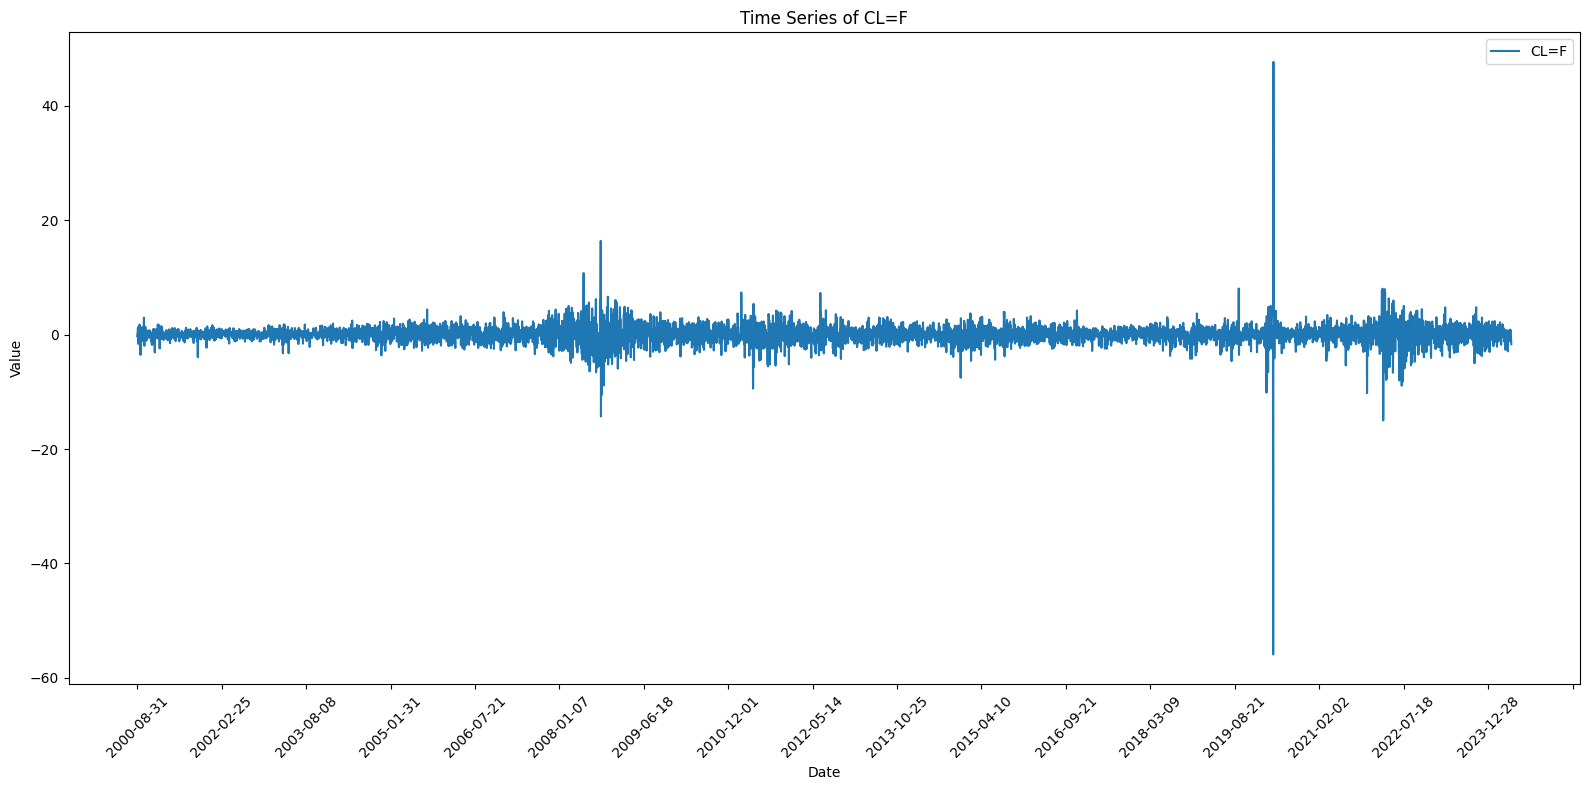

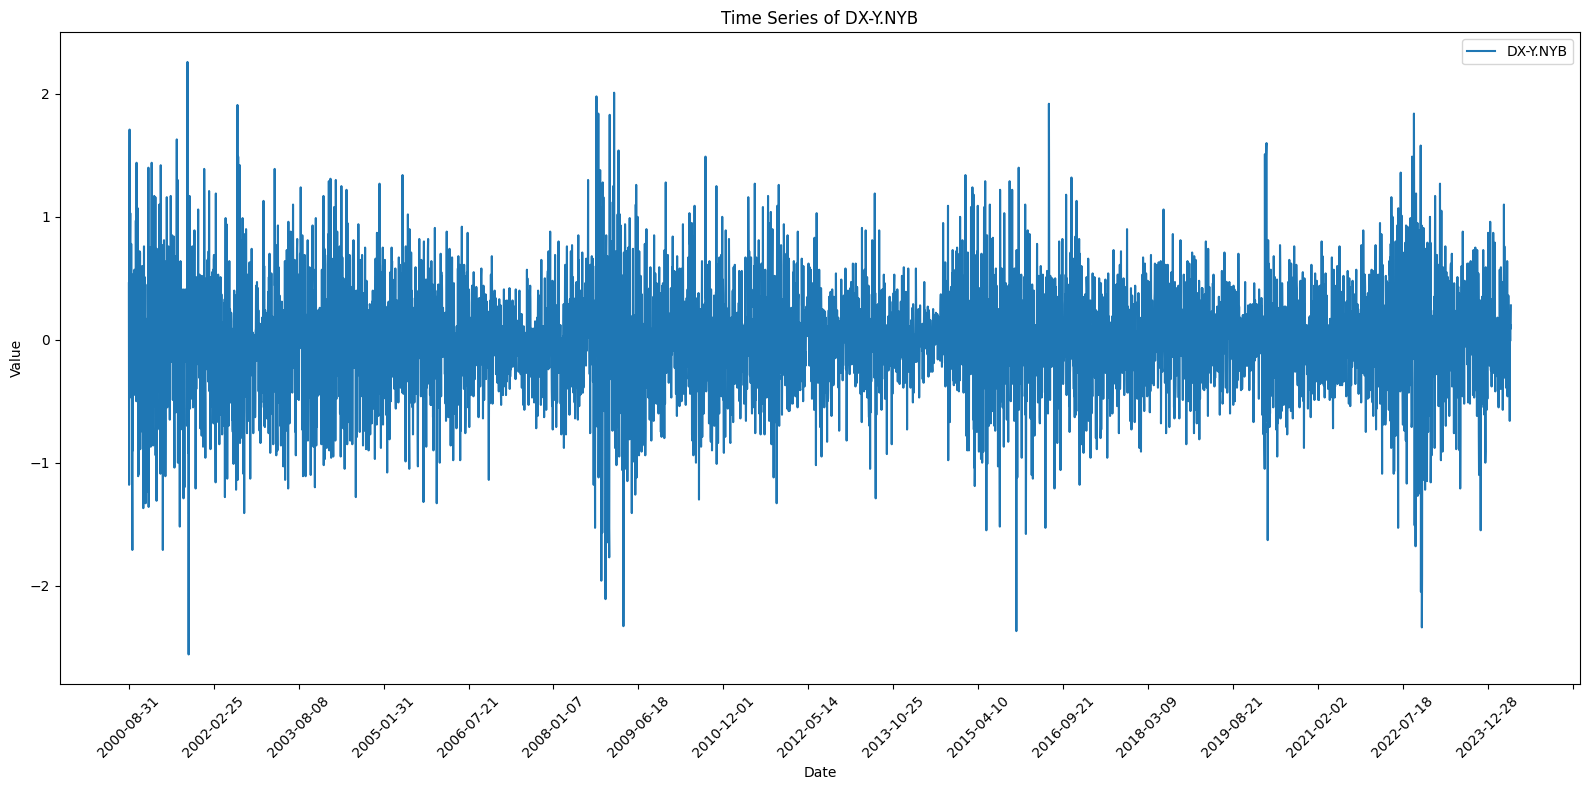

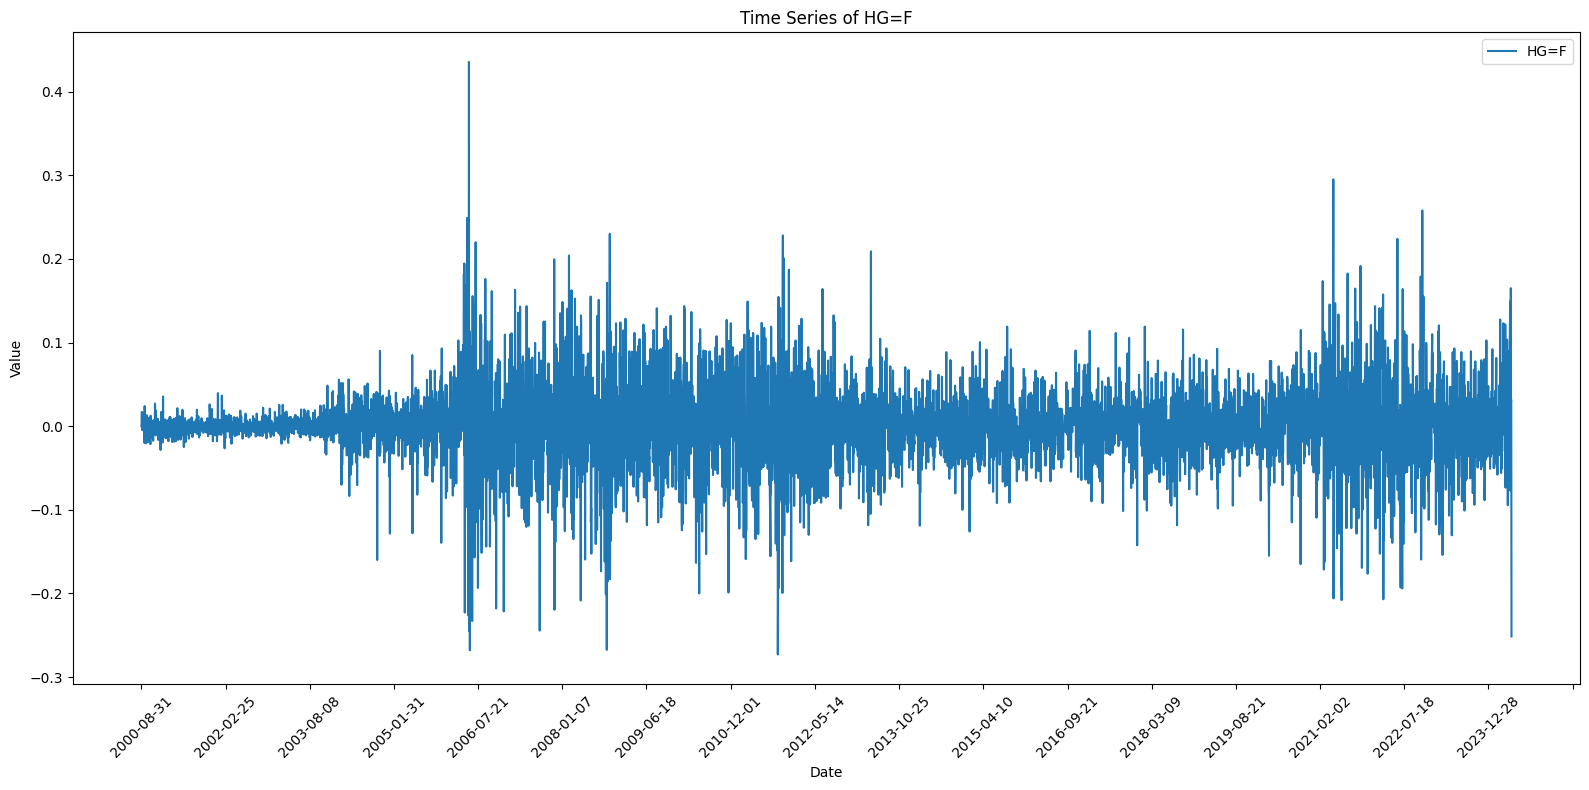

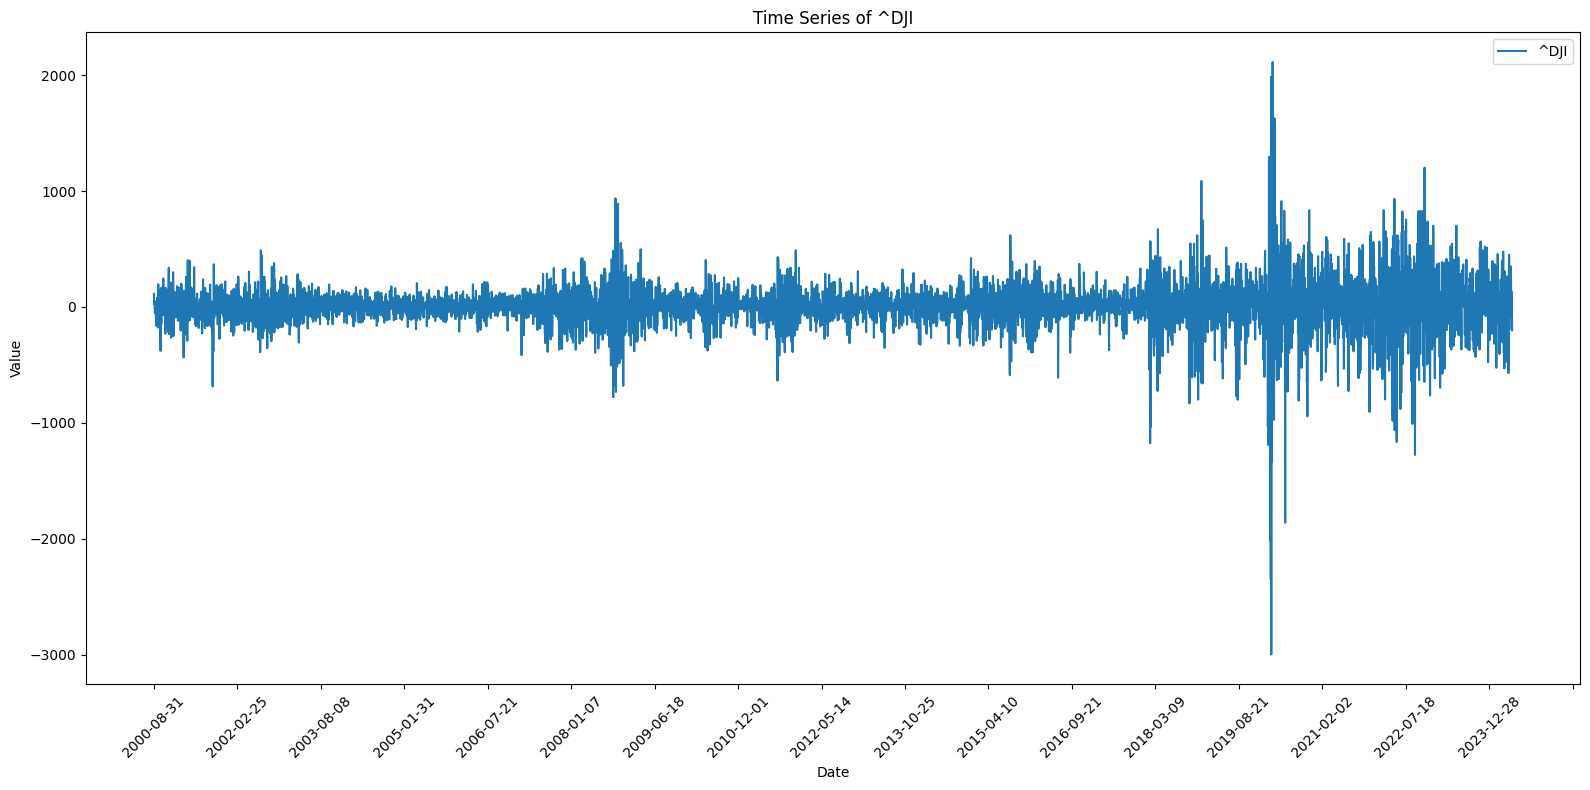

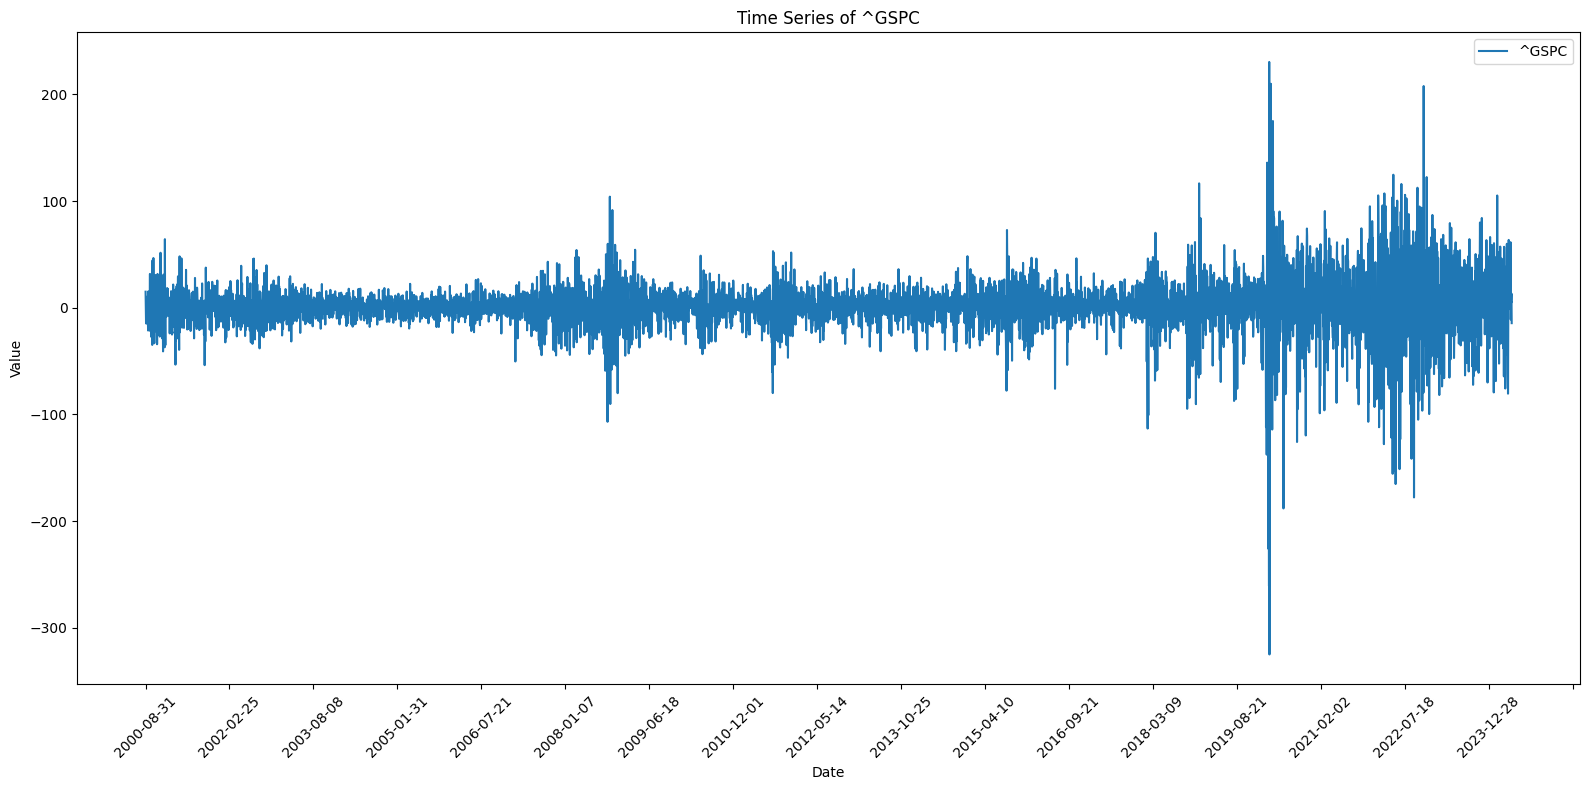

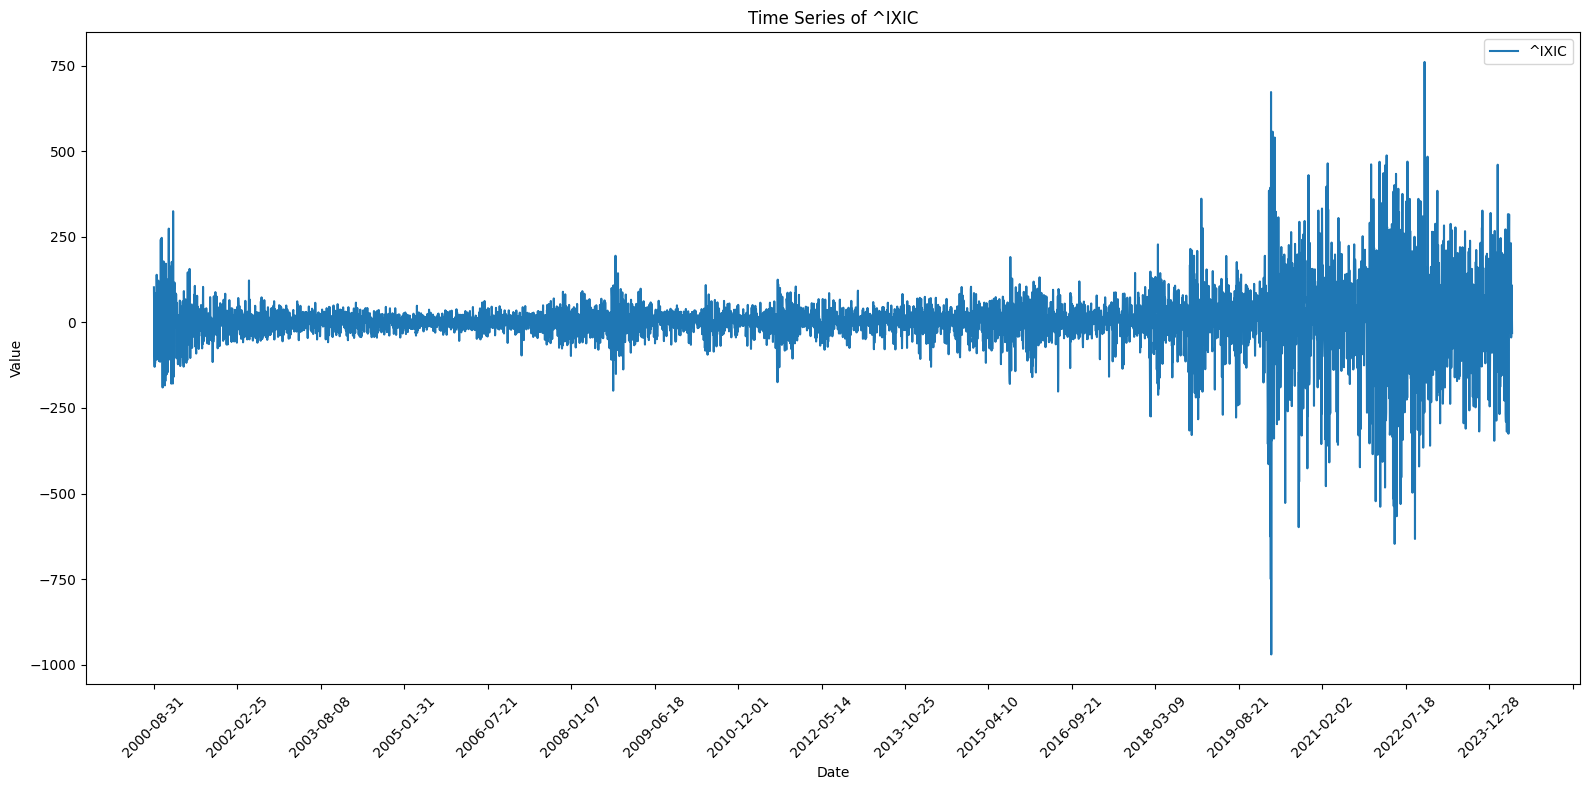

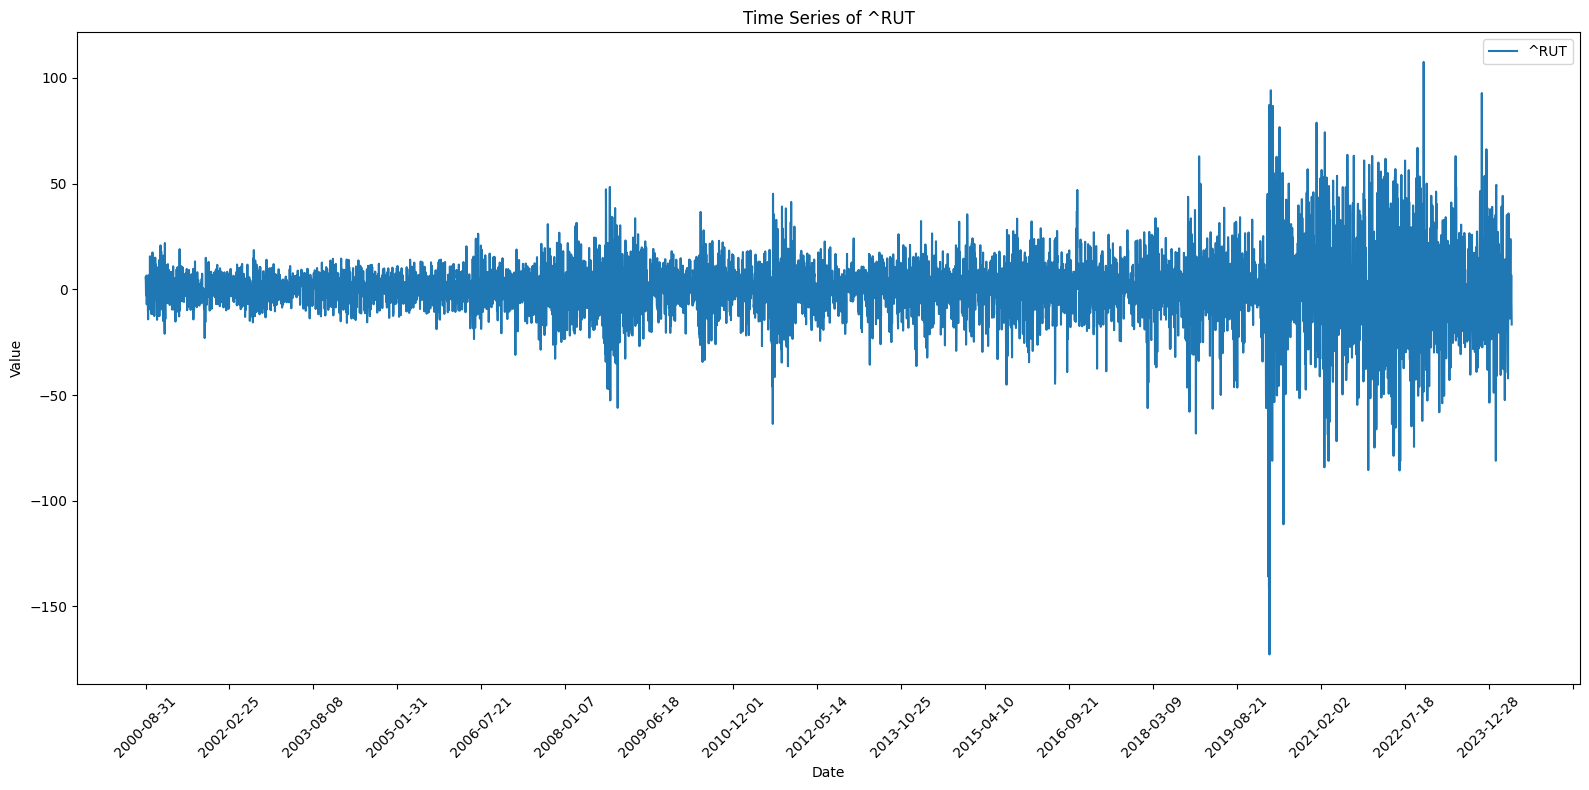

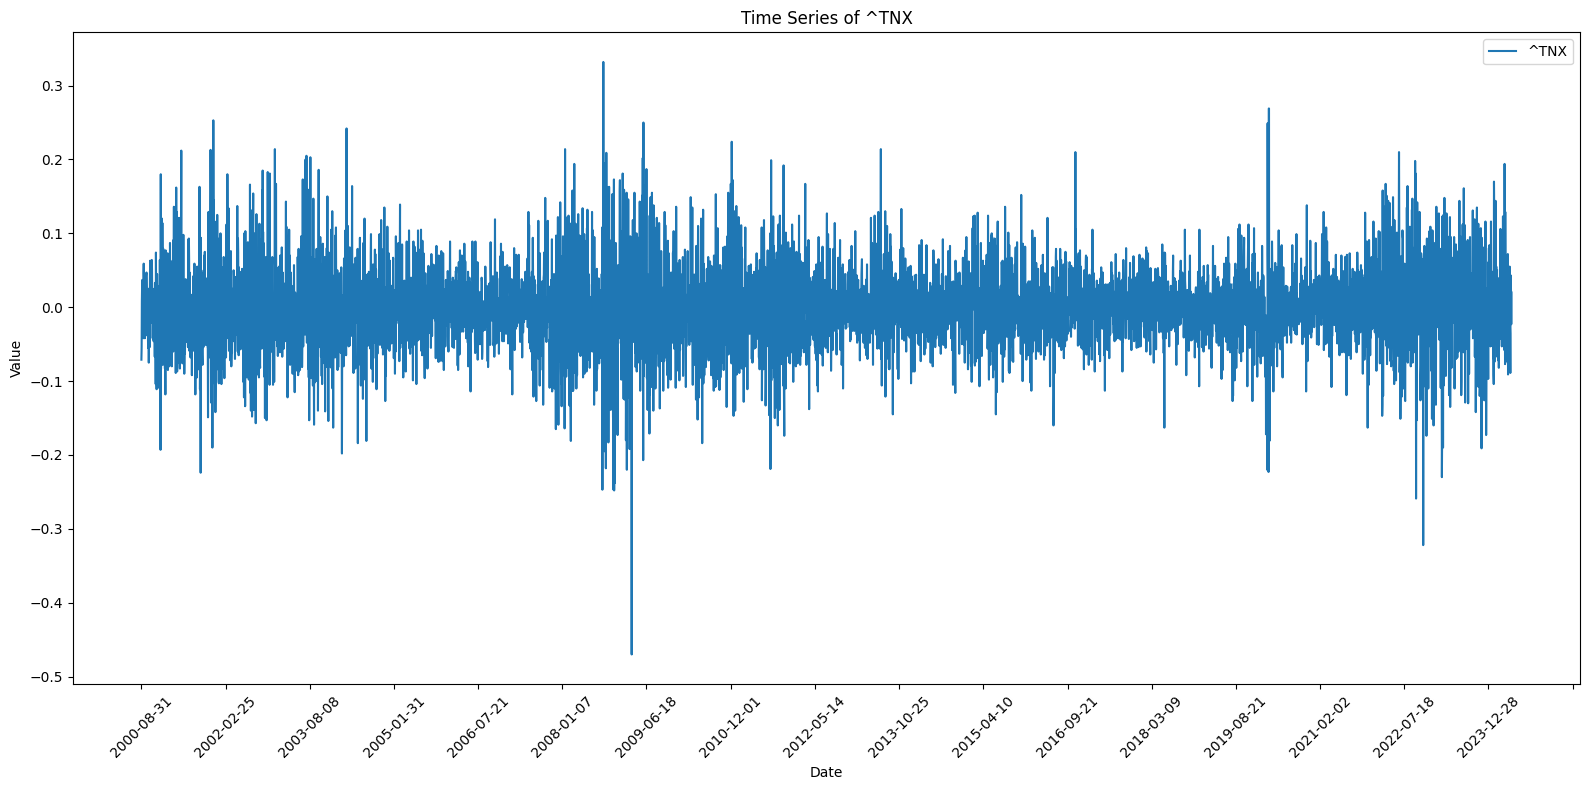

In [11]:
for col in non_stationary_series:
    plot_series(data_diff[col],'{}'.format(col))

### Train Test split for time series data

- When modeling time series, the division between the training set and the test set cannot use the previous method of random division, otherwise, the sequential characteristics of the data cannot be preserved.

- The correct approach is to divide the time period into two parts, with the sequence of the first part as the training set and the sequence of the second part as the test set.

- Time series models use the lagged values of the series to predict the current value. How many lags to use is a hyperparameter that needs to be tuned. In our exercise, the target variable for each period is a 9-dimensional vector $ \mathbf{y_t}$，The feature variables for predicting this target variable are: $p \times 9$ matrix $\mathbf{X_t}$，where $p$ indicates the lags。In econometrics, Vector Autoregressive Models with p lags VAR(p), is a special case of the model。VAR is a linear regression model，i.e., $\mathbf{y_t}= \mathbf{A}\mathbf{X_t}^T  +  \mathbf{\mu_t}$
  
- In the following code, we set $p=30$ and use the initial 80% of serieses as training sample。


In [12]:
def train_test_construction(df, ratio=0.8, lags=30):
    training_data_len = math.ceil(len(df)* ratio)
    train, test = df[0:training_data_len], df[training_data_len:]
    train_index = train.index[lags:len(train)]
    test_index = test.index[(lags-1):len(test)]
    train_data = train.values
    test_data = test.values

    x_train = []
    y_train = []
    y_train_label = []
    for i in range(lags, len(train_data)):
        x_train.append(train_data[i-lags:i, :])
        y_train.append(train_data[i, :])
    y_train_label = [[1 if v > 0 else 0 for v in value] for value in y_train]
    x_train, y_train, y_train_label = np.array(x_train), np.array(y_train), np.array(y_train_label)
    
    x_test = []
    y_test = []
    y_test_lable = []
    for i in range(lags, len(test_data)):
        x_test.append(test_data[i-lags:i,:])
        y_test.append(test_data[i, :])
    
    y_test_label = [[1 if v > 0 else 0 for v in value] for value in y_test]
    x_test, y_test, y_test_label = np.array(x_test), np.array(y_test),np.array(y_test_label)
    return (x_train, x_test, y_train, y_test, train_index, test_index)

x_train, x_test, y_train, y_test, train_dates_index, test_dates_index = train_test_construction(data_diff, ratio=0.8, lags=30)
print('Diminesion of training feature data:', x_train.shape)
print('Diminesion of training target data:', y_train.shape)
#print('Diminesion of training target lable data:', y_train_label.shape)
print('Diminesion of test feature data:', x_test.shape)
print('Diminesion of test target data:', y_test.shape)
#print('Diminesion of test target label data:', y_test_label.shape)

Diminesion of training feature data: (4726, 30, 9)
Diminesion of training target data: (4726, 9)
Diminesion of test feature data: (1159, 30, 9)
Diminesion of test target data: (1159, 9)


##### Flatten data to vector

In [ ]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)
x_test.shape

In [ ]:
from sklearn.metrics import mean_squared_error
def prediction(model_name,x_train,y_train,x_test):
    starting_date = test_dates_index[0]
    if model_name == 'linear_reg':
        model = LinearRegression()
    if model_name == 'rf':
        model = RandomForestRegressor(n_estimators=50, min_samples_leaf=5)
    if model_name == 'dt':
        model = DecisionTreeRegressor(min_samples_leaf=70)
    if model_name == 'knn':
        model = KNeighborsRegressor(n_neighbors=5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    test_score = mean_squared_error(y_test, y_pred)
    df = pd.DataFrame(y_pred, columns=data_diff.columns, index=test_dates_index[1:])
    df[non_stationary_series] = df[non_stationary_series].cumsum() + close_prices[non_stationary_series].loc[starting_date]
    return df, test_score

forecast_original_space, test_score = prediction('knn',x_train,y_train,x_test)
print(test_score)

## Neural Network Predictions

#### Keras Version of Implementing Recurrent Neural Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense
from keras.callbacks import EarlyStopping

# Assuming the input shape and preparing the RNN model
model = Sequential([
    SimpleRNN(30, return_sequences=True, input_shape=(30, 9)), # (h1, h2, ..., h30)
    # return_sequences=True to return the hiddent states at each timestep
    SimpleRNN(50), # z30
    Dense(9)  # Output layer for predicting 9 features
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30, 30)            1200      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                4050      
                                                                 
 dense (Dense)               (None, 9)                 459       
                                                                 
Total params: 5,709
Trainable params: 5,709
Non-trainable params: 0
_________________________________________________________________


$h_t = tanh(W_{hh}h_{t-1} + W_{xh}X_t), y_T = W_{yh}h_T$

In [21]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    callbacks=[es],
                    epochs=100,
                    batch_size=64,
                    verbose=1)

## 4726 / 64

Epoch 1/100
74/74 [==============================] - 9s 61ms/step - loss: 2541.3008 - mse: 2541.3008 - val_loss: 19073.3555 - val_mse: 19073.3555
Epoch 2/100
74/74 [==============================] - 3s 47ms/step - loss: 2523.0818 - mse: 2523.0818 - val_loss: 19060.9453 - val_mse: 19060.9453
Epoch 3/100
74/74 [==============================] - 3s 47ms/step - loss: 2518.7327 - mse: 2518.7327 - val_loss: 19057.3867 - val_mse: 19057.3867
Epoch 4/100
74/74 [==============================] - 4s 48ms/step - loss: 2517.3762 - mse: 2517.3762 - val_loss: 19054.4473 - val_mse: 19054.4473
Epoch 5/100
74/74 [==============================] - 4s 47ms/step - loss: 2516.7769 - mse: 2516.7769 - val_loss: 19053.7227 - val_mse: 19053.7227
Epoch 6/100
74/74 [==============================] - 4s 48ms/step - loss: 2516.3833 - mse: 2516.3833 - val_loss: 19052.8359 - val_mse: 19052.8359
Epoch 7/100
74/74 [==============================] - 4s 48ms/step - loss: 2516.0527 - mse: 2516.0527 - val_loss: 19053.3652 

In [29]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)
test_score = mean_squared_error(y_test, y_pred)
print(test_score)

37/37 [==============================] - 1s 4ms/step
19036.690007399295


#### PyTorch Version of Implementing the RNN

In [41]:
import torch
import torch.nn as nn
from torchinfo import summary
from torch.utils.data import Dataset, DataLoader, TensorDataset

class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        # Define the first SimpleRNN layer
        self.rnn1 = nn.RNN(input_size=9, hidden_size=30, batch_first=True, num_layers=1)
        # Define the second SimpleRNN layer
        self.rnn2 = nn.RNN(input_size=30, hidden_size=50, batch_first=True, num_layers=1)
        # Define the output layer
        self.dense = nn.Linear(50, 9)

    def forward(self, x):
        # Forward pass through the first SimpleRNN layer
        x, _ = self.rnn1(x) 
        # x contains the output feature ℎ_t from the last layer of the RNN for each timestep.
        # _ contains hidden state for the last timestep for each layer, for each sequence in the batch.
        # Forward pass through the second SimpleRNN layer
        x, _ = self.rnn2(x)
        # Since we need to feed the last timestep into the dense layer:
        x = x[:, -1, :]
        # The shape of x is (batch_size, sequence_length, hidden_size)
        # Forward pass through the dense layer
        x = self.dense(x)
        return x

x_train_tensor = torch.from_numpy(x_train.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
dataset = TensorDataset(x_train_tensor, y_train_tensor)
batch_size = 64  # Define your batch size
# Creating data loader
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNNModel().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()


In [40]:
x_test_tensor = torch.from_numpy(x_test.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

# Create TensorDataset for test data
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# Create DataLoader for test data
test_data_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # Batch size can be adjusted
# Set model to evaluation mode
model.eval()

# Initialize variables to calculate average MSE
total_mse = 0.0
num_batches = 0

# Compute MSE without tracking gradients
with torch.no_grad():
    for inputs, targets in test_data_loader:
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to the same device as the model
        outputs = model(inputs)
        mse = criterion(outputs, targets)
        total_mse += mse.item()
        num_batches += 1

average_mse = total_mse / num_batches
print("Average MSE on Test Data:", average_mse)

Average MSE on Test Data: 18389.914306640625


#### Flatten freature tensor

In [25]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)
x_test.shape

(1155, 270)

### Comparing the predictive performance of different models
- Linear Regression. This model is precisely the VAR(30) model in econometrics.

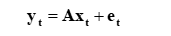  
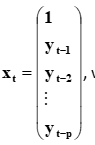

- Decision Tree

- Random Forest

- K-Nearest Neighbors

The intuitive explanation for the last three non-parametric algorithms is that for a given date in the test set, they search for the most similar days in the training set to make predictions.

In [38]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

def prediction(model_name,x_train,y_train,x_test):
    starting_date = test_dates_index[0]
    if model_name == 'linear_reg':
        model = LinearRegression()
    if model_name == 'rf':
        model = RandomForestRegressor(n_estimators=50, min_samples_leaf=5)
    if model_name == 'dt':
        model = DecisionTreeRegressor(min_samples_leaf=5)
    if model_name == 'knn':
        model = KNeighborsRegressor(n_neighbors=45)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    test_score = mean_squared_error(y_test, y_pred)
    df = pd.DataFrame(y_pred, columns=data_diff.columns, index=test_dates_index[1:])
    df[non_stationary_series] = df[non_stationary_series].cumsum() + close_prices[non_stationary_series].loc[starting_date]
    return df, test_score

forecast_original_space, test_score = prediction('knn',x_train,y_train,x_test)
print(test_score)

18976.66706683


In [20]:
import torch
import torch.nn as nn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from keras.callbacks import EarlyStopping
from torchinfo import summary

class TimeSeries(object):
    
    def __init__(self, nfeatures, timesteps=30, train_size=0.8, scalar=None):
        self.nfeatures=nfeatures
        self.timesteps=timesteps
        self.train_size=train_size
        self.scalar=scalar 
        
    def flatten(self, x):
        return x.reshape((x.shape[0], -1))

    def train_test_construction(self, df):
        training_data_len = math.ceil(len(df)* self.train_size)
        train, test = df[0:training_data_len], df[training_data_len:]
        train_index = train.index[timesteps:len(train)]
        test_index = test.index[(timesteps-1):len(test)]
        train_data = train.values
        test_data = test.values

        scalar = scale_method()
        if scalar is None:
            pass
        else:
            train_data = scalar.fit_transform(train_data)
        x_train = []
        y_train = []

        for i in range(timesteps, len(train_data)):
            x_train.append(train_data[i-timesteps:i, :])
            y_train.append(train_data[i, :])
        x_train, y_train = np.array(x_train), np.array(y_train)

        if scalar is None:
            pass
        else:
            test_data = scalar.fit_transform(test_data)
        x_test = []
        y_test = []
        for i in range(lags, len(test_data)):
            x_test.append(test_data[i-timesteps:i,:])
            y_test.append(test_data[i, :])

        x_test, y_test = np.array(x_test), np.array(y_test)
        return (x_train, x_test, y_train, y_test, scalar, train_index, test_index)

    def scale_method(self):
        if self.scalar == "min_max":
            scaler = MinMaxScaler(feature_range=(0,1))
        if self.scalar == "standard":
            scalar = StandardScaler()
        if self.scalar is None:
            scaler = None
        return scaler    

    def keras(self, units=50):
        # Assuming the input shape and preparing the RNN model
        model = Sequential([
            SimpleRNN(units, return_sequences=True, input_shape=(self.timesteps, self.nfeatures)), 
            # return_sequences=True to return the hiddent states at each timestep
            SimpleRNN(units),
            Dense(self.nfeatures)  # Output layer for predicting 3 features
        ])
        return model

    def ml_models(self, model_name, x_train, y_train, x_test):
        x_train = self.flatten(x_train)
        x_test = self.flatten(x_test)
        if model_name == 'linear_reg':
            model = LinearRegression()
        if model_name == 'rf':
            model = RandomForestRegressor(n_estimators=50, min_samples_leaf=5)
        if model_name == 'dt':
            model = DecisionTreeRegressor(min_samples_leaf=5)
        if model_name == 'knn':
            scalar = scale_method(method = 'min_max')
            x_train = scalar.fit_transform(x_train)
            x_test = scalar.fit_transform(x_test) 
            model = KNeighborsRegressor(n_neighbors=5)
        model.fit(x_train, y_train)




In [16]:
len(forecast_original_space)

1129

In [86]:
forecast_original_space

CL=F    DX-Y.NYB      HG=F          ^DJI        ^GSPC  \
Date                                                                     
4/29/2019   63.329997   98.184004  2.978900  26574.749614  2941.455860   
4/30/2019   63.531998   98.152003  2.977900  26635.245710  2948.907886   
5/1/2019    62.919996   98.156003  2.986300  26647.539070  2951.073877   
5/2/2019    62.917998   98.200002  2.993600  26649.116022  2949.913867   
5/3/2019    62.985996   98.262003  2.983100  26697.256258  2955.511816   
...               ...         ...       ...           ...          ...   
10/13/2023 -22.938013  120.969940  5.651301  37651.869181  3976.586239   
10/16/2023 -23.566013  121.067941  5.657301  37629.679729  3973.140267   
10/17/2023 -23.150013  120.869942  5.622601  37612.883633  3972.710238   
10/18/2023 -23.722013  120.819939  5.644901  37626.299261  3971.062264   
10/19/2023 -24.070017  121.047939  5.630501  37655.811371  3972.586239   

                   ^IXIC         ^RUT      ^TNX    ^VIX  
Date                                                     
4/29/2019    8142.831836  1588.682006  2.496800  10.588  
4/30/2019    8182.791797  1594.586010  2.501000  10.322  
5/1/2019     8186.097852  1596.406005  2.498200  10.504  
5/2/2019     8185.255762  1591.415990  2.484800  10.922  
5/3/2019     8197.441797  1594.319994  2.500200  10.896  
...                  ...          ...       ...     ...  
10/13/2023  11060.805063  1503.622944  8.162599  12.244  
10/16/2023  11048.803012  1496.668927  8.143799  11.872  
10/17/2023  11049.717124  1495.094916  8.147599  12.058  
10/18/2023  11040.623130  1491.520929  8.152998  12.100  
10/19/2023  11042.933091  1493.856940  8.162599  12.626  

[1129 rows x 9 columns]

###### The data shown above represents the prediction results of VAR(30) on the test set.

In [17]:
(len(train_dates_index)+30)
x_train.shape

(4608, 270)

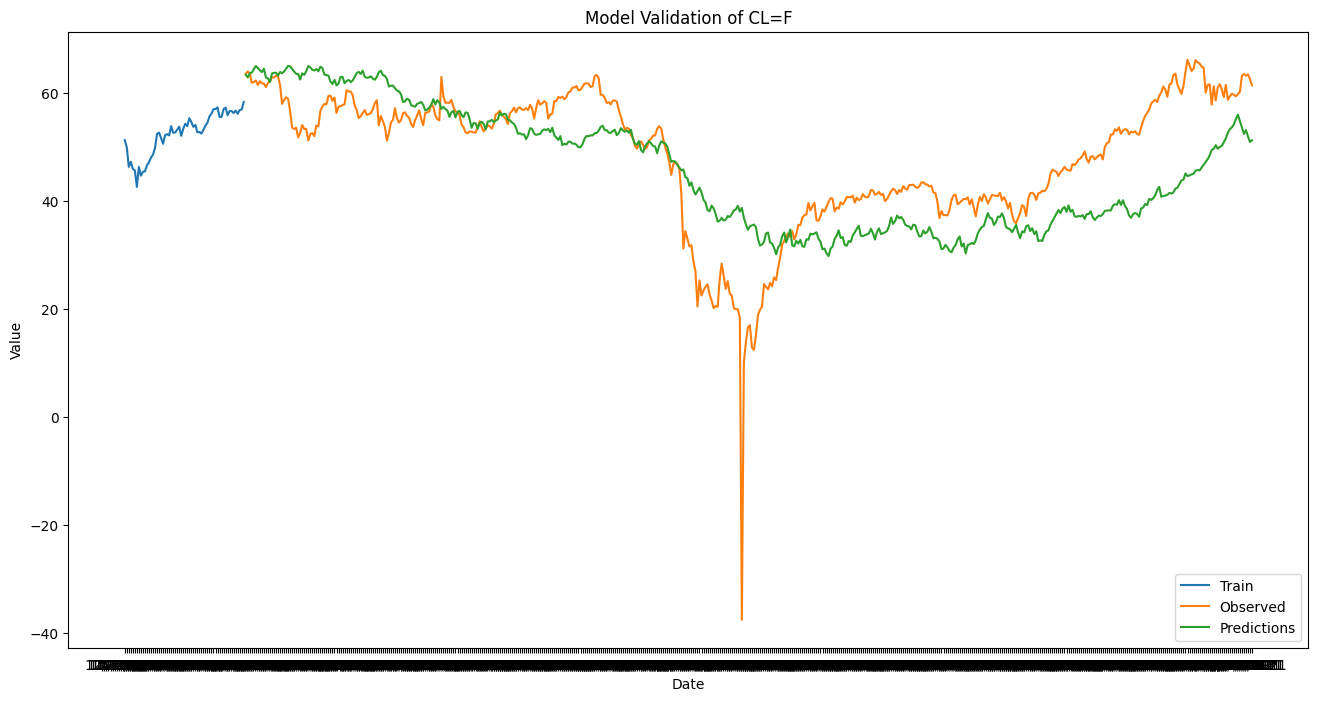

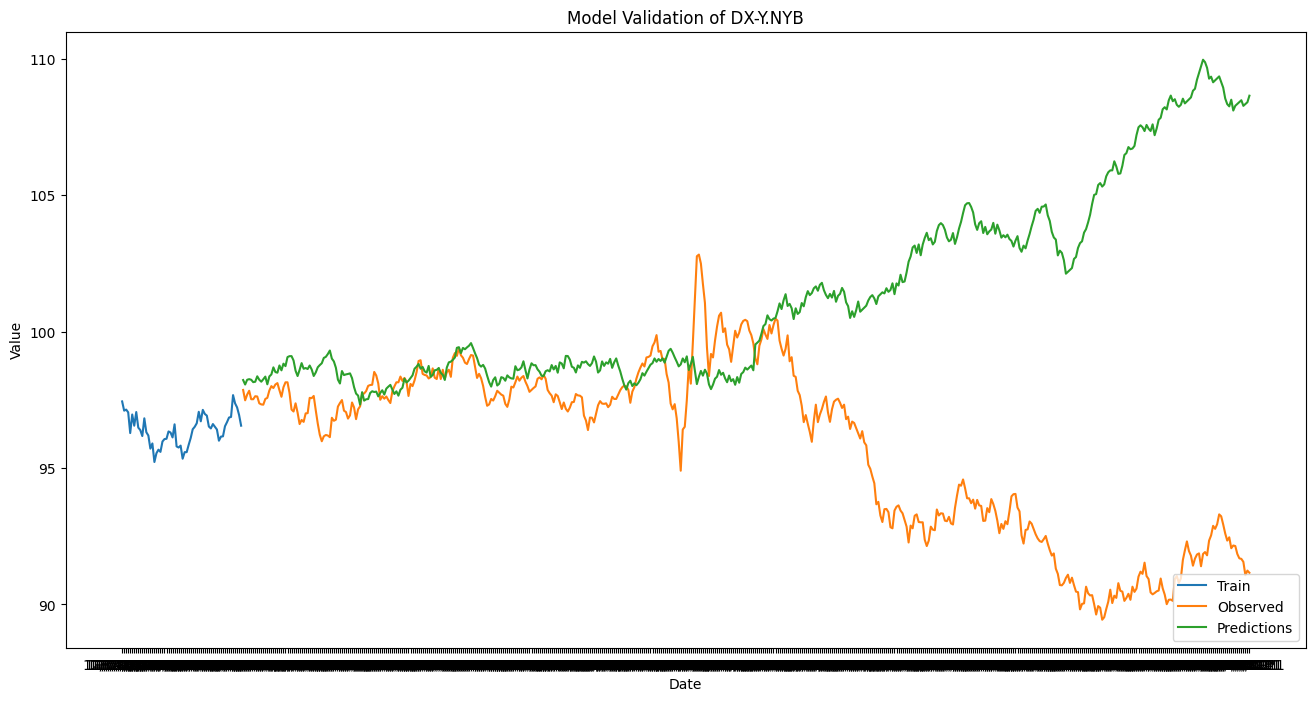

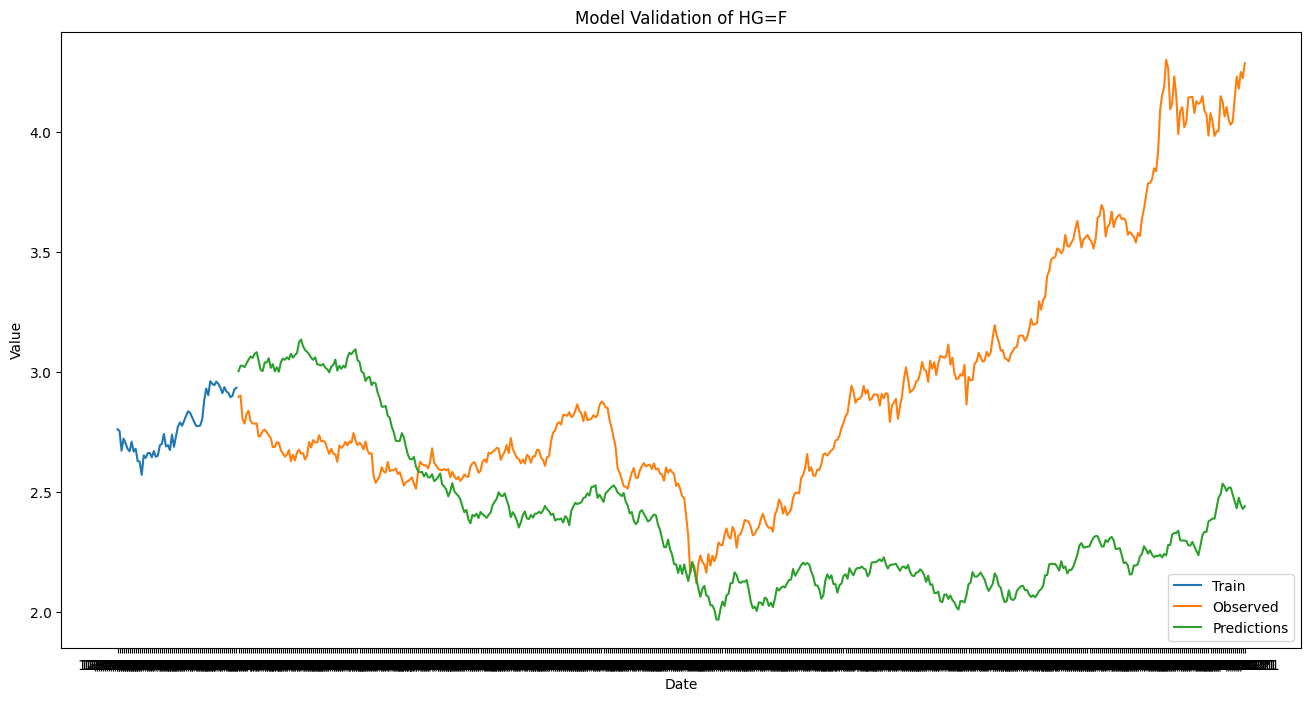

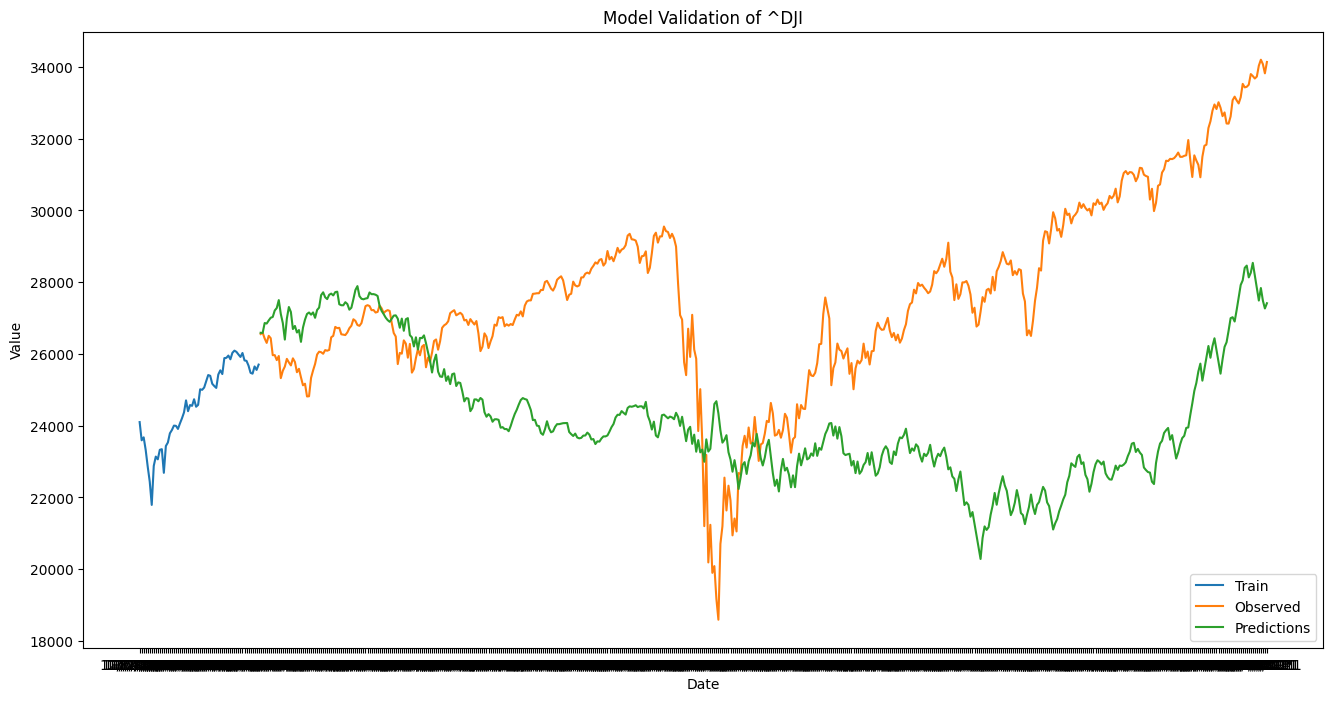

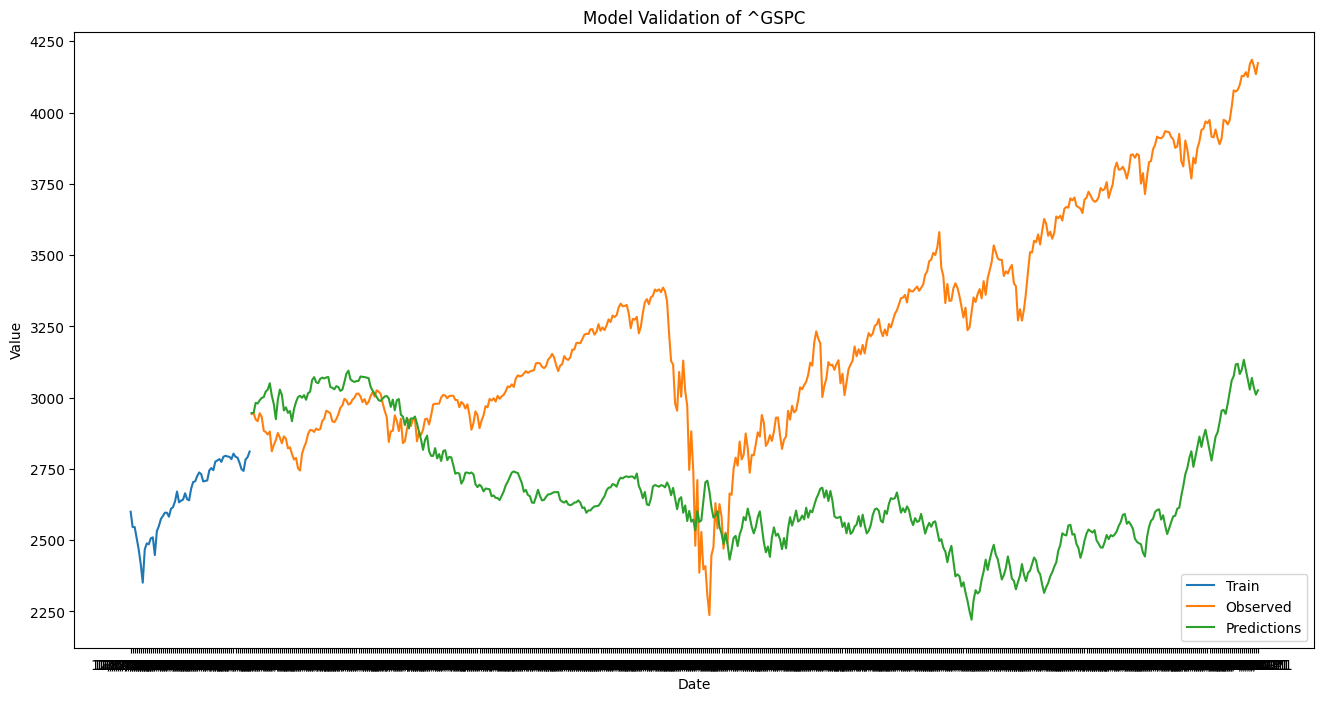

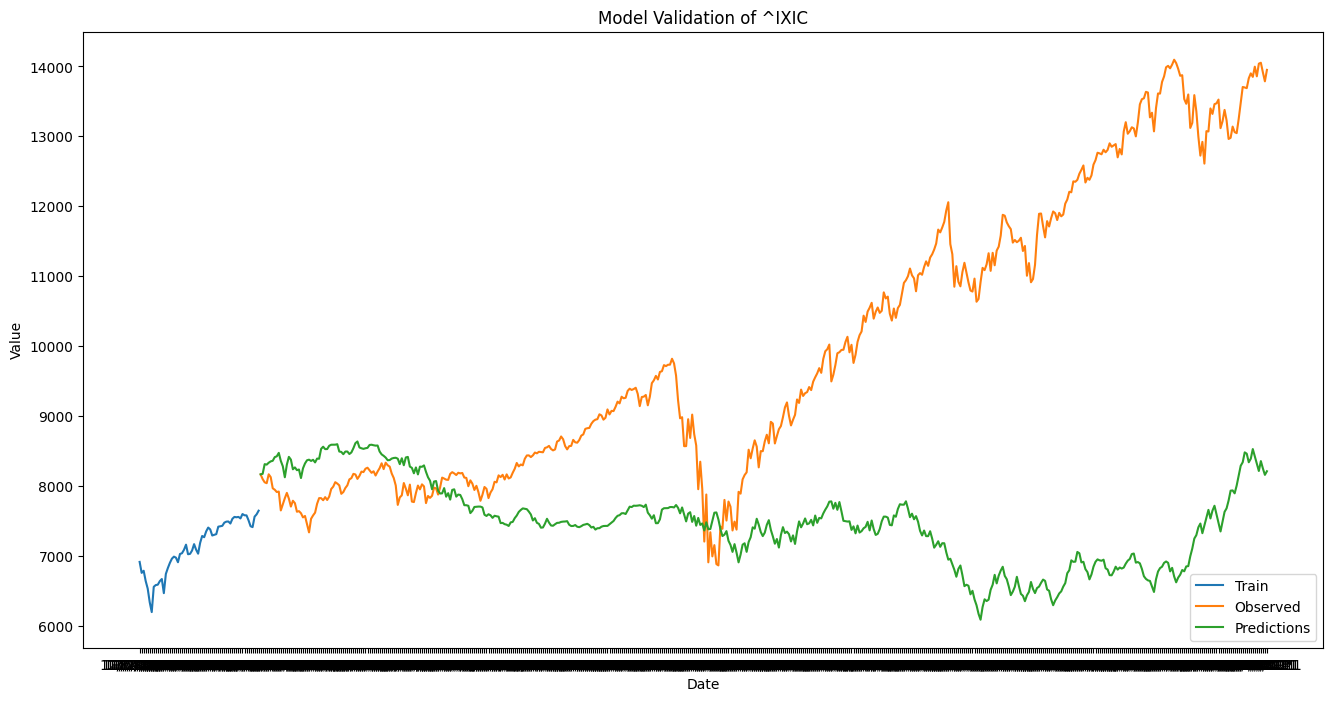

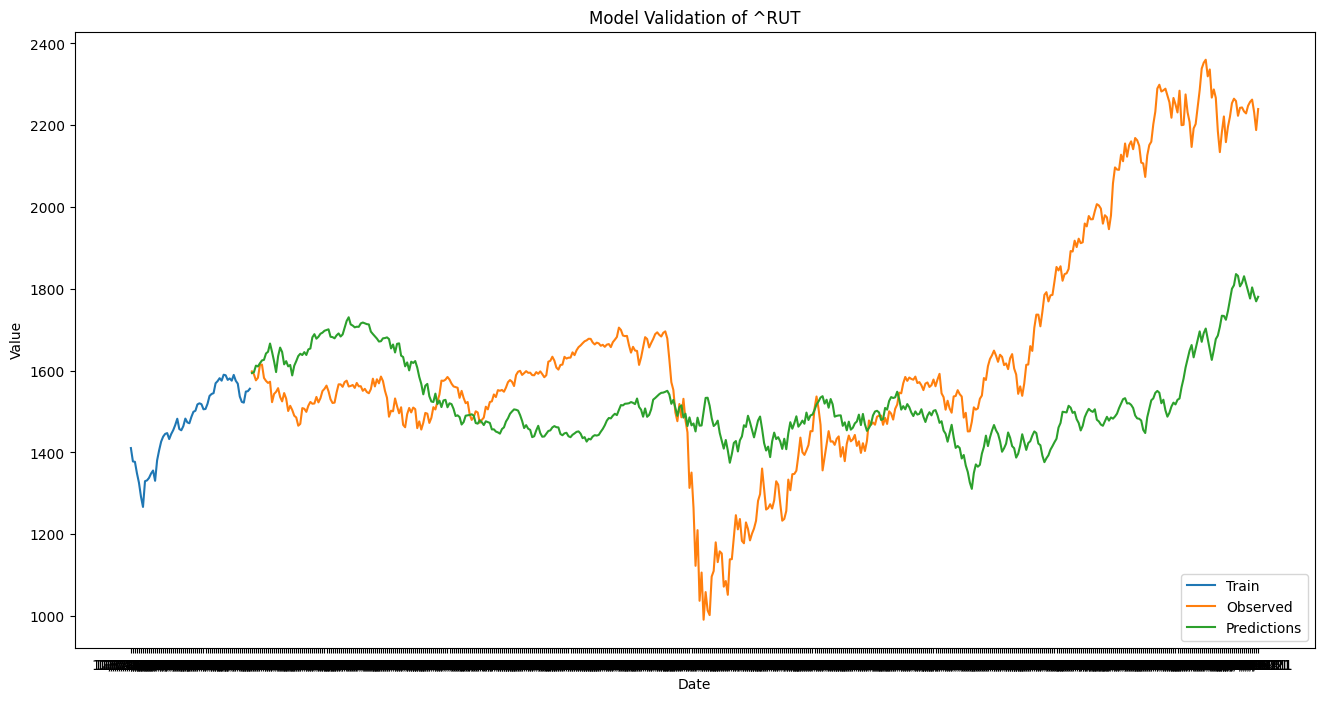

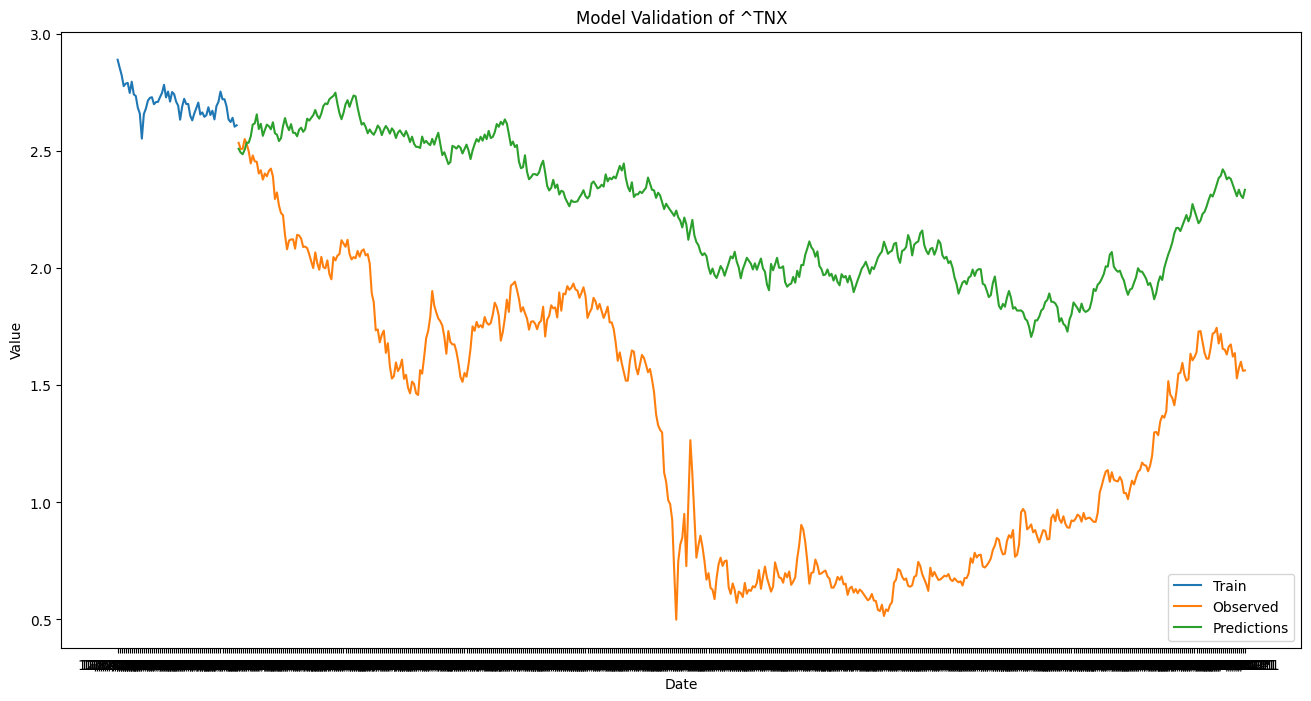

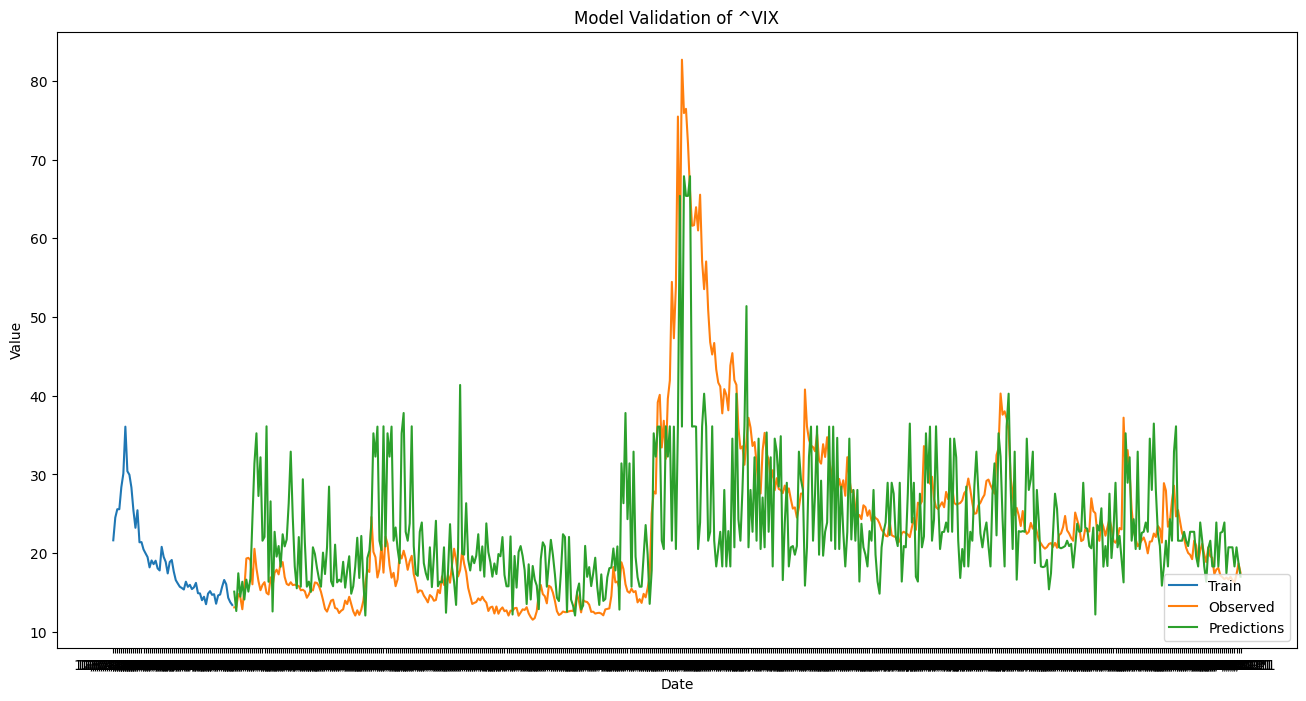

In [19]:
def validation_plot(series_name, prediction_window=100, model_lags=30):
    data_plt = pd.DataFrame(close_prices[series_name], index=close_prices.index)
    train = data_plt[:(len(train_dates_index)+model_lags)]
    validation = data_plt.loc[test_dates_index[1:]].copy()
    validation['Predictions'] = forecast_original_space[series_name]
    plt.figure(figsize=(16,8))
    plt.title('Model Validation of {}'.format(series_name))
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.plot(train[-60:])
    plt.plot(validation[validation.columns][0:prediction_window])
    plt.legend(['Train', 'Observed', 'Predictions'], loc='lower right')
    plt.show()
    return validation

for col in forecast_original_space.columns:
    val = validation_plot(col, prediction_window=500, model_lags=30)

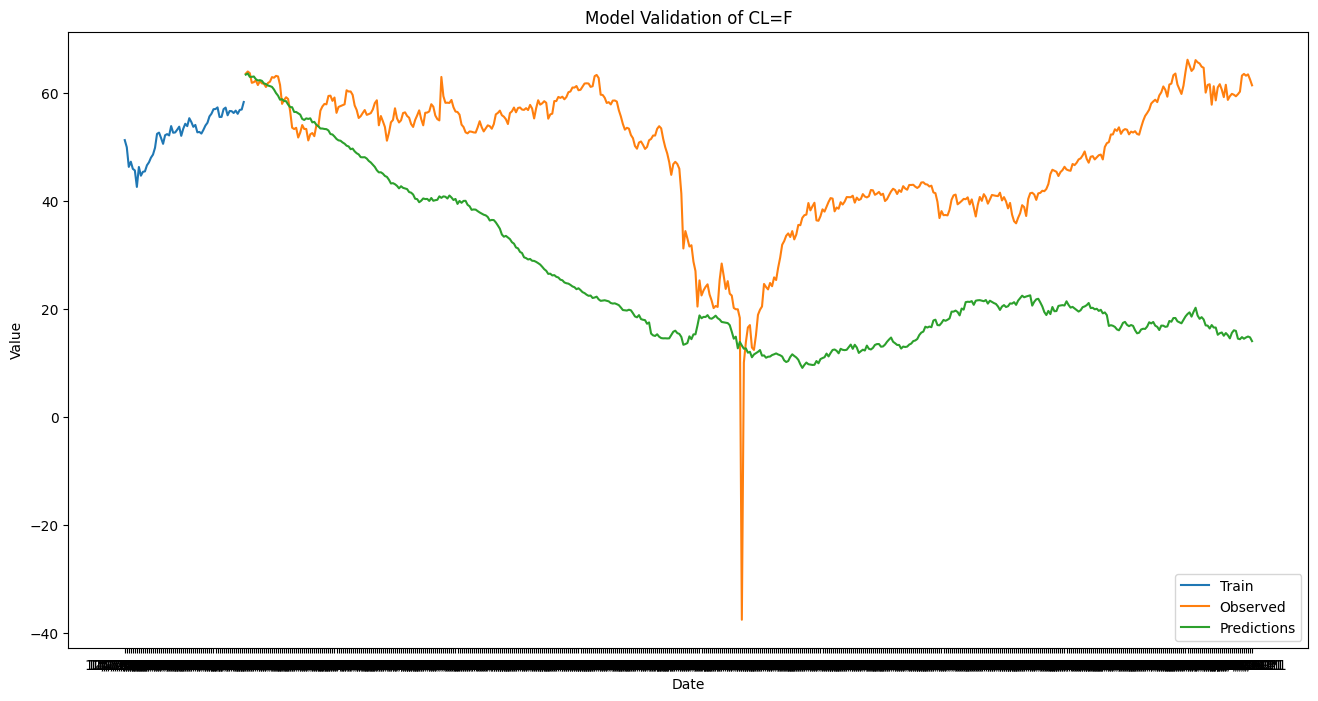

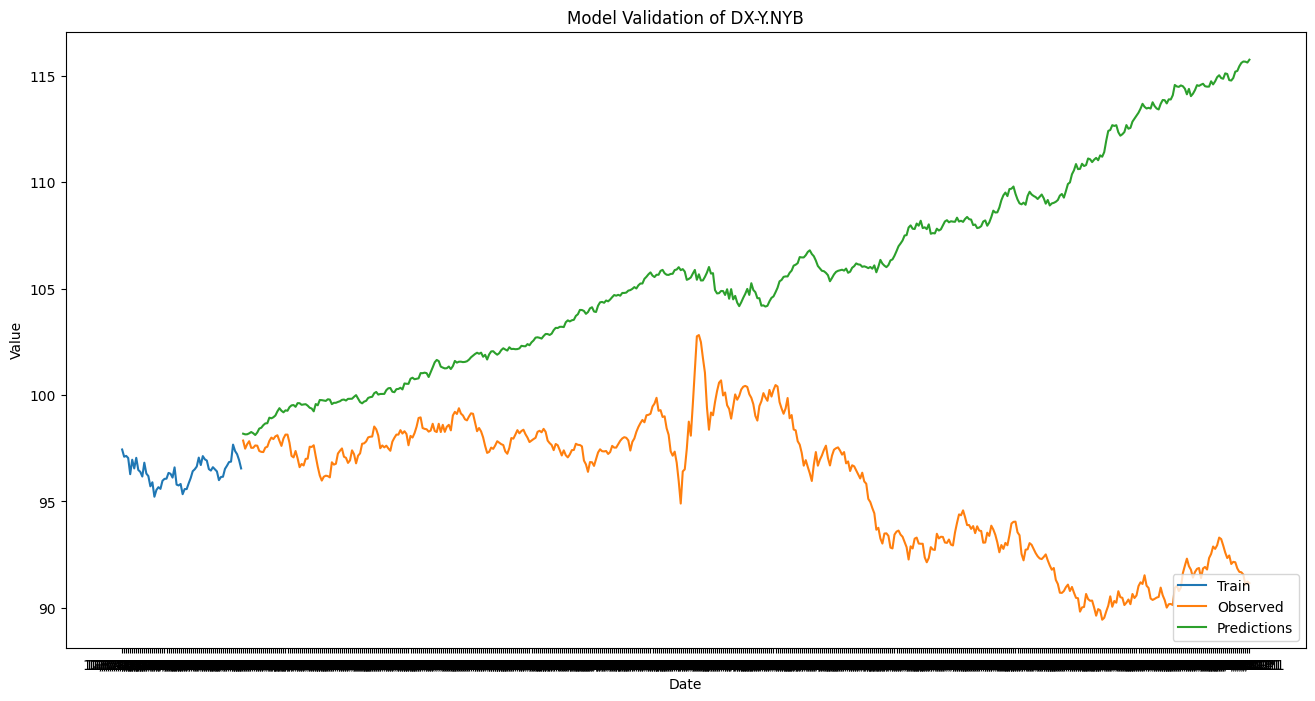

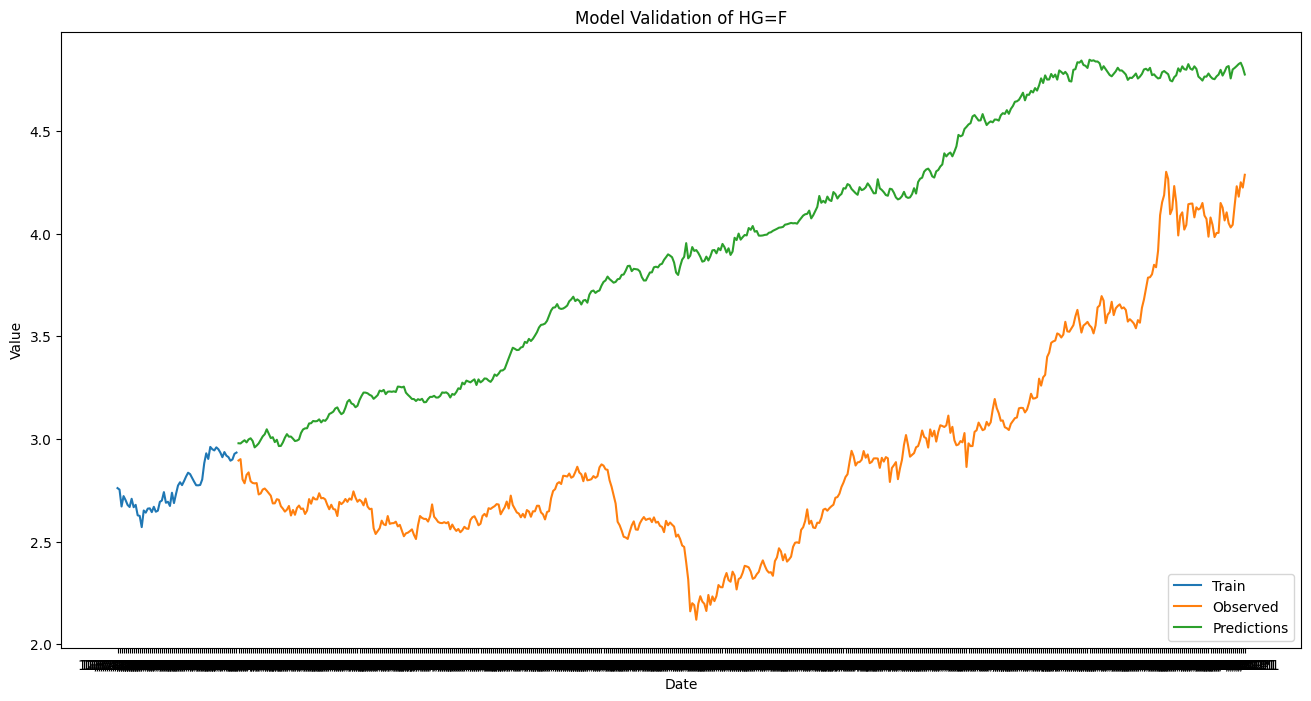

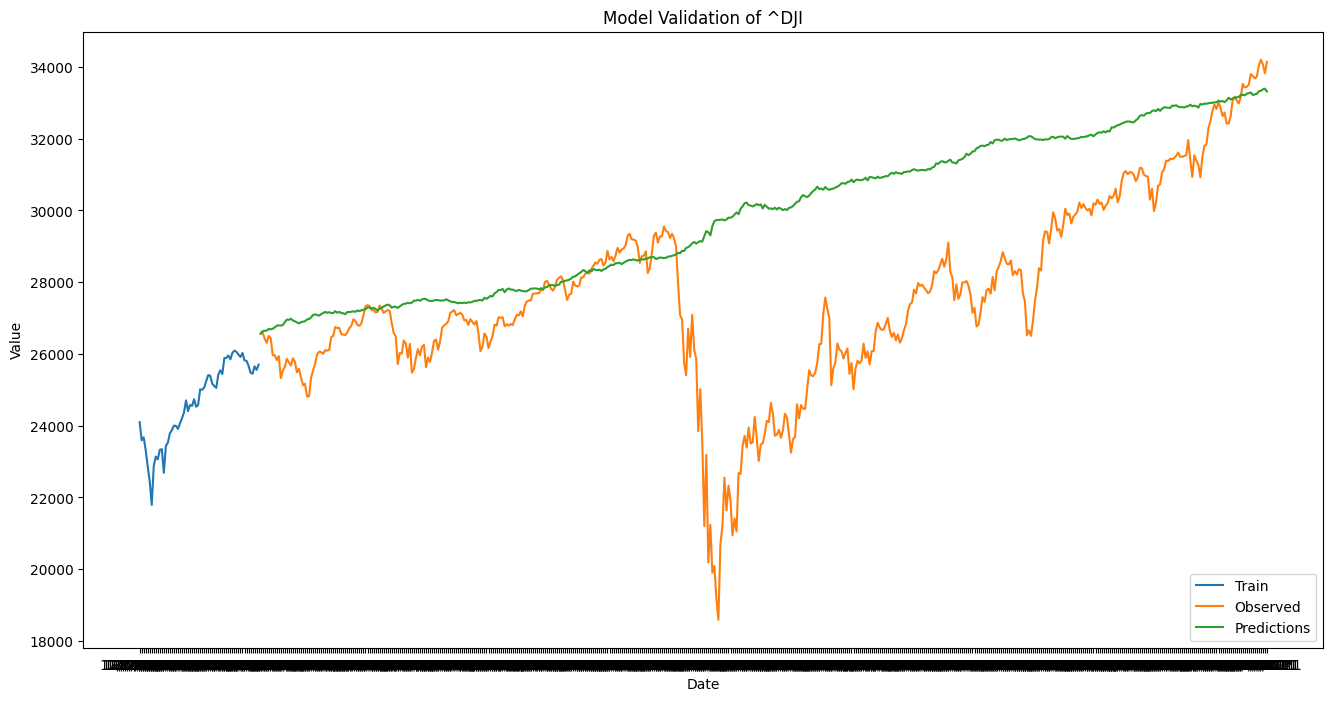

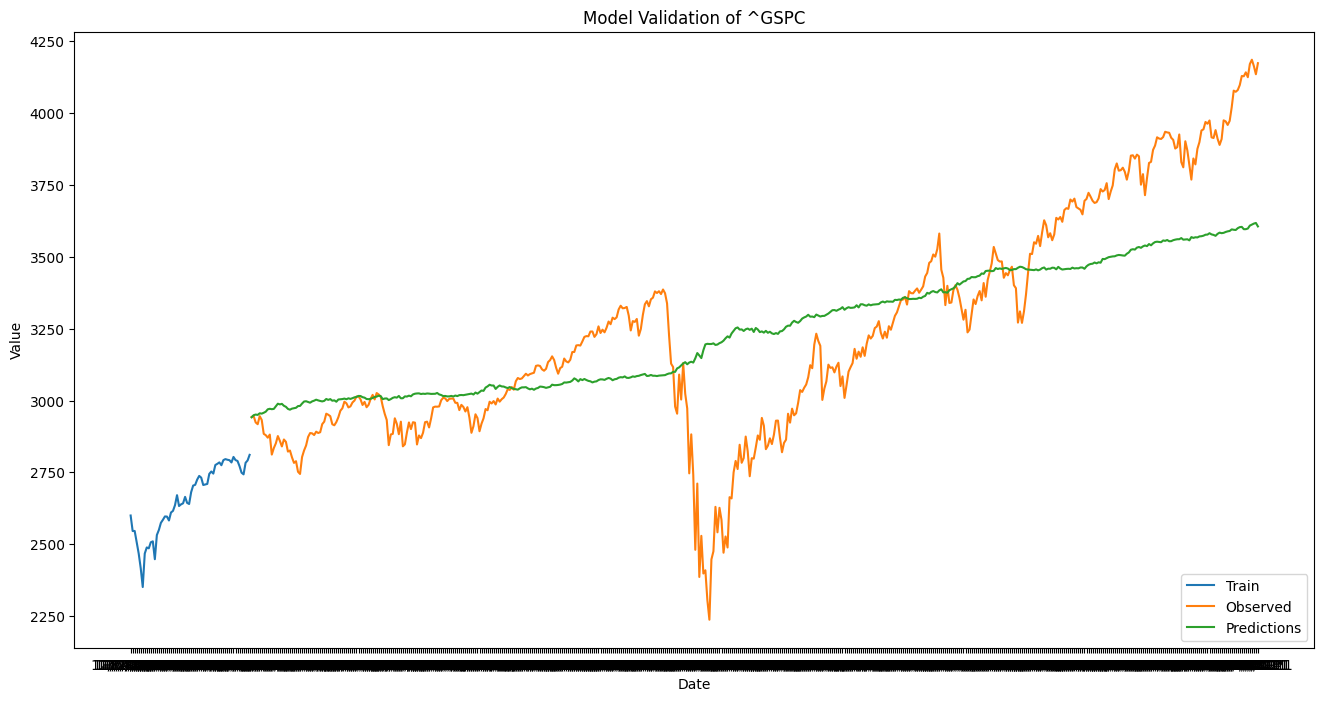

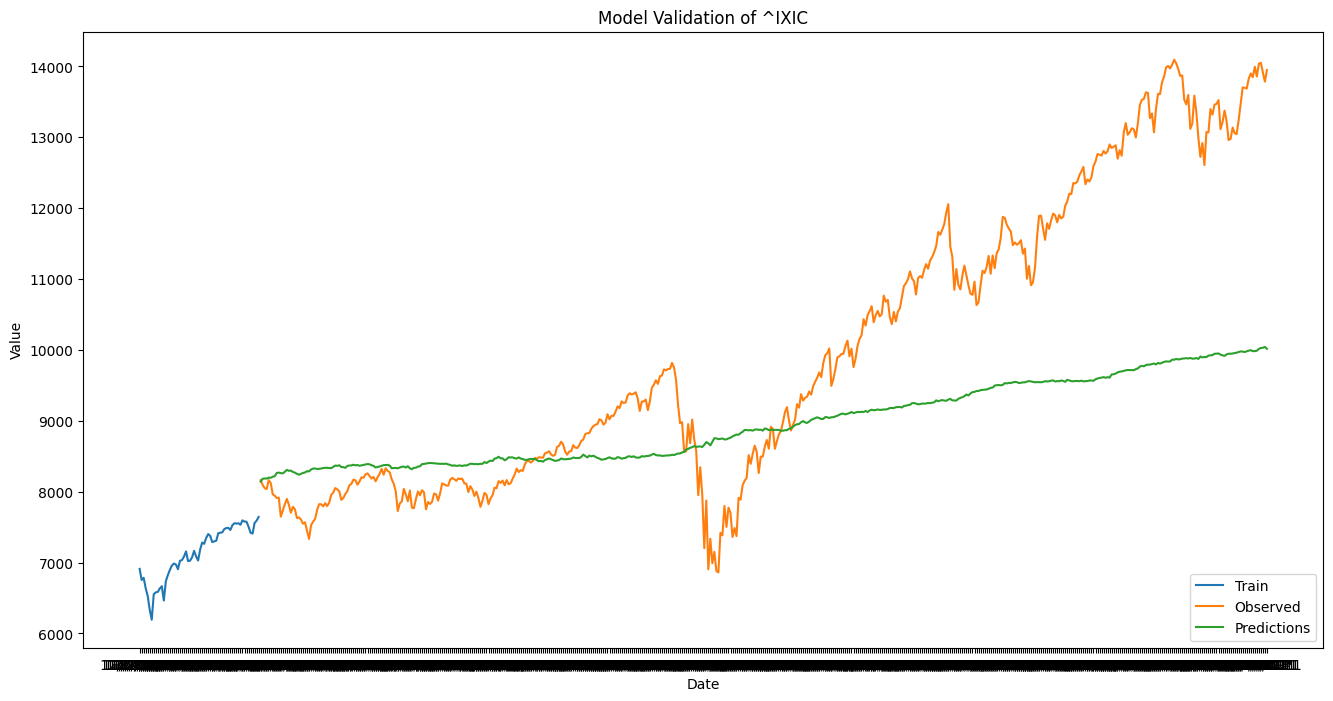

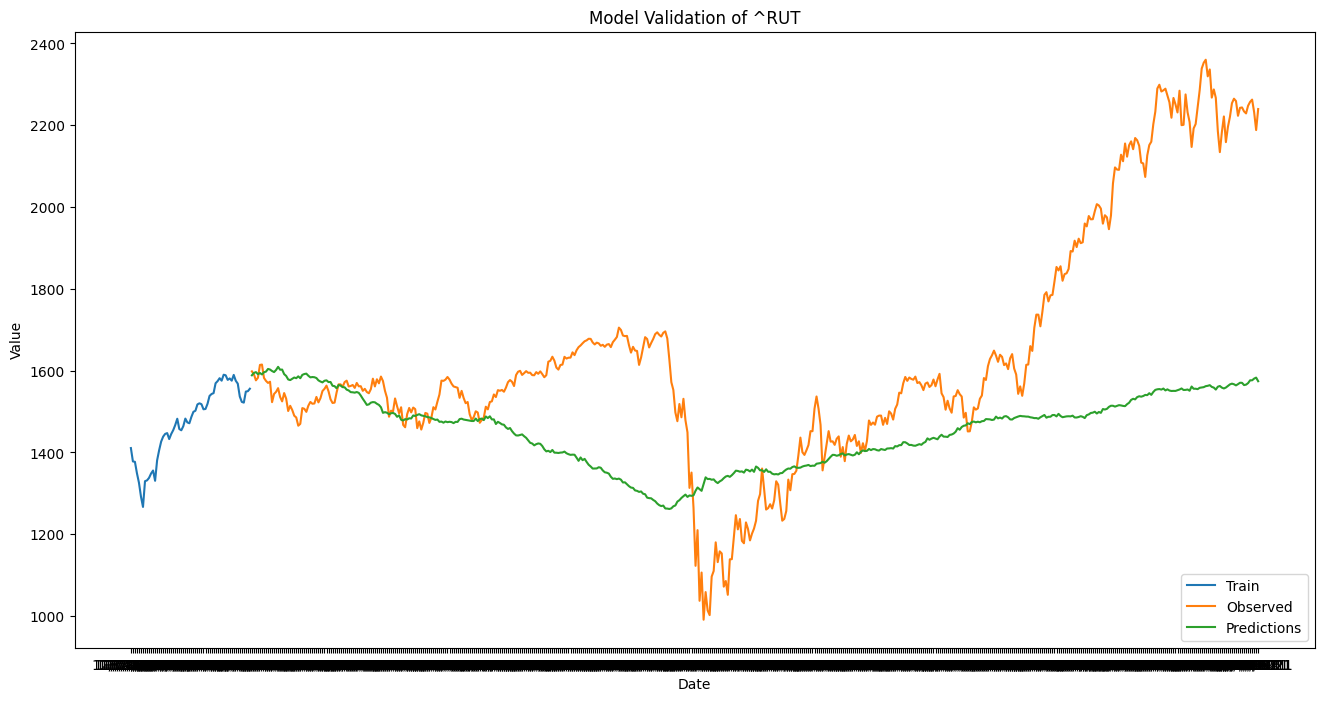

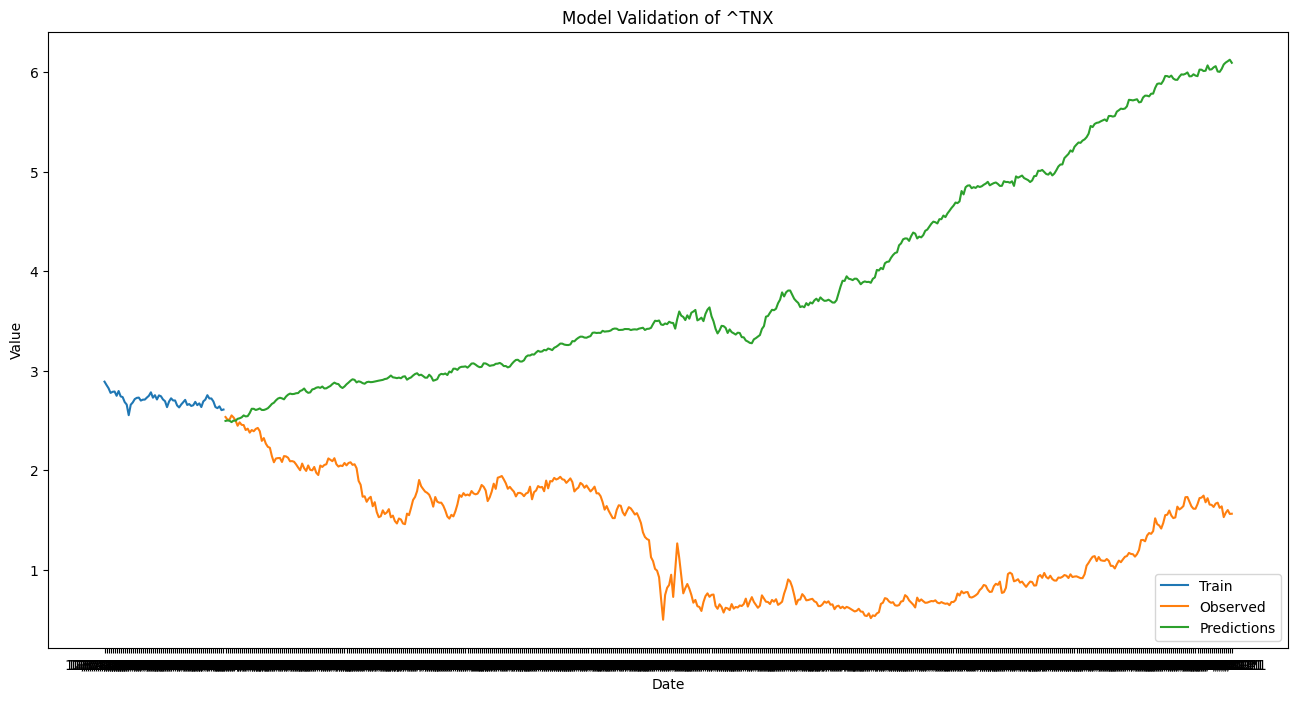

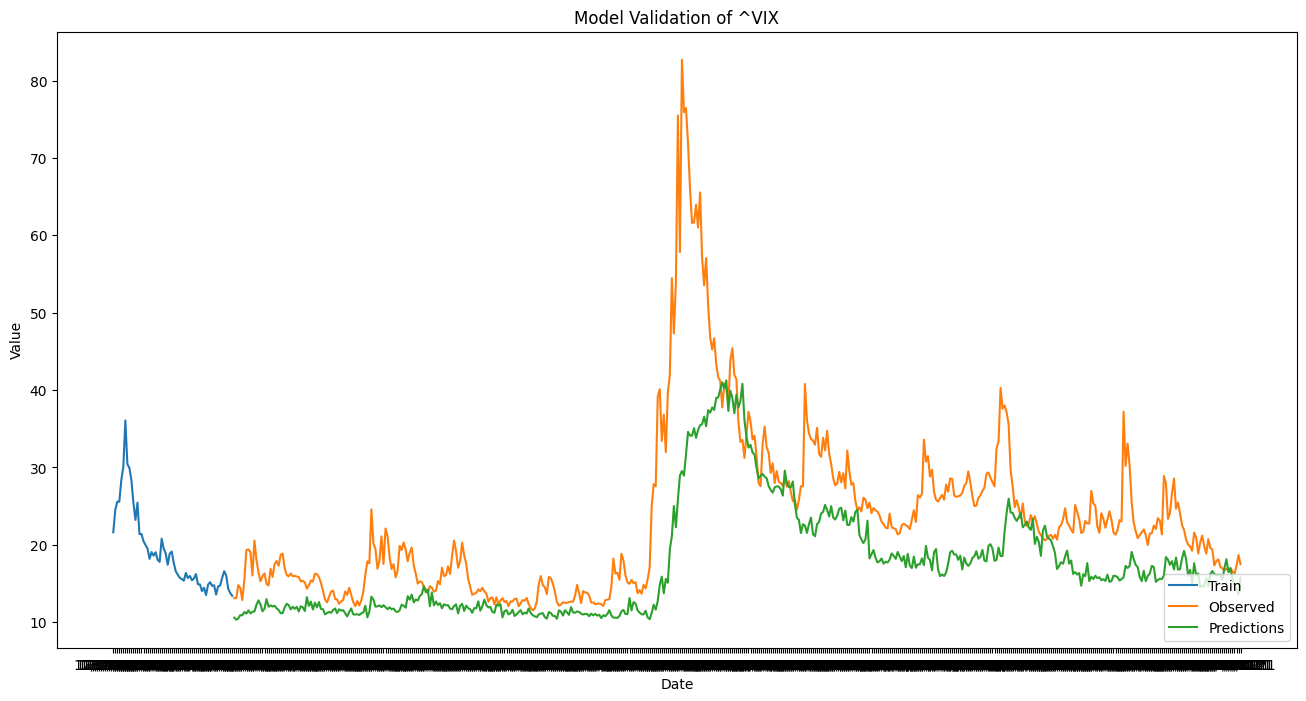

In [19]:
forecast_original_space = prediction_models('knn',x_train,y_train,x_test) 
for col in forecast_original_space.columns:
    val = validation_plot(col, prediction_window=500, model_lags=30)

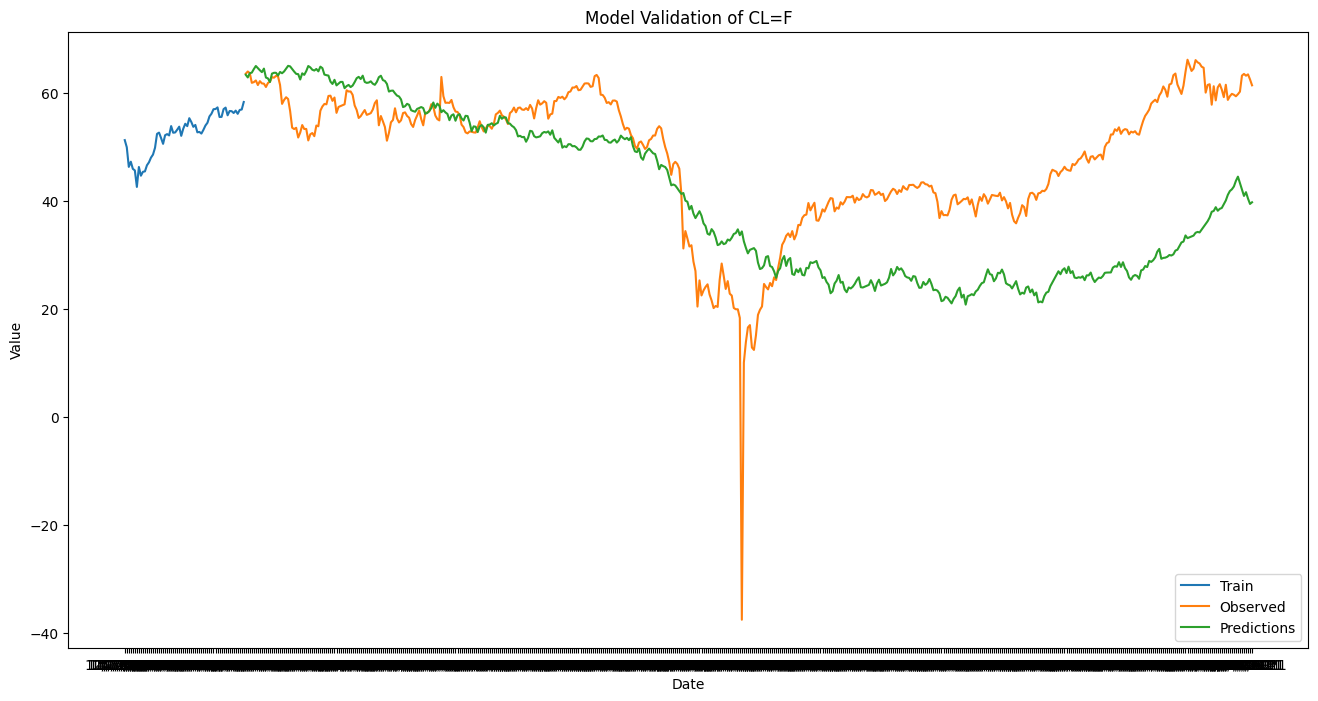

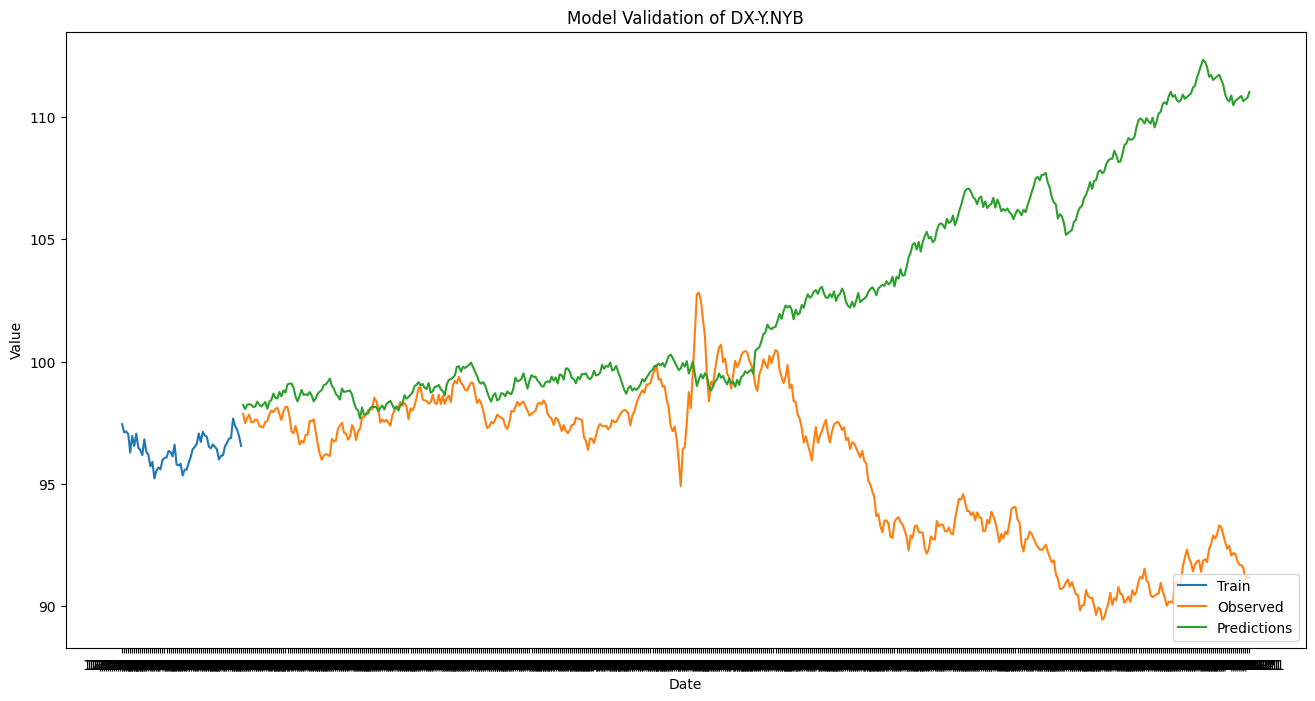

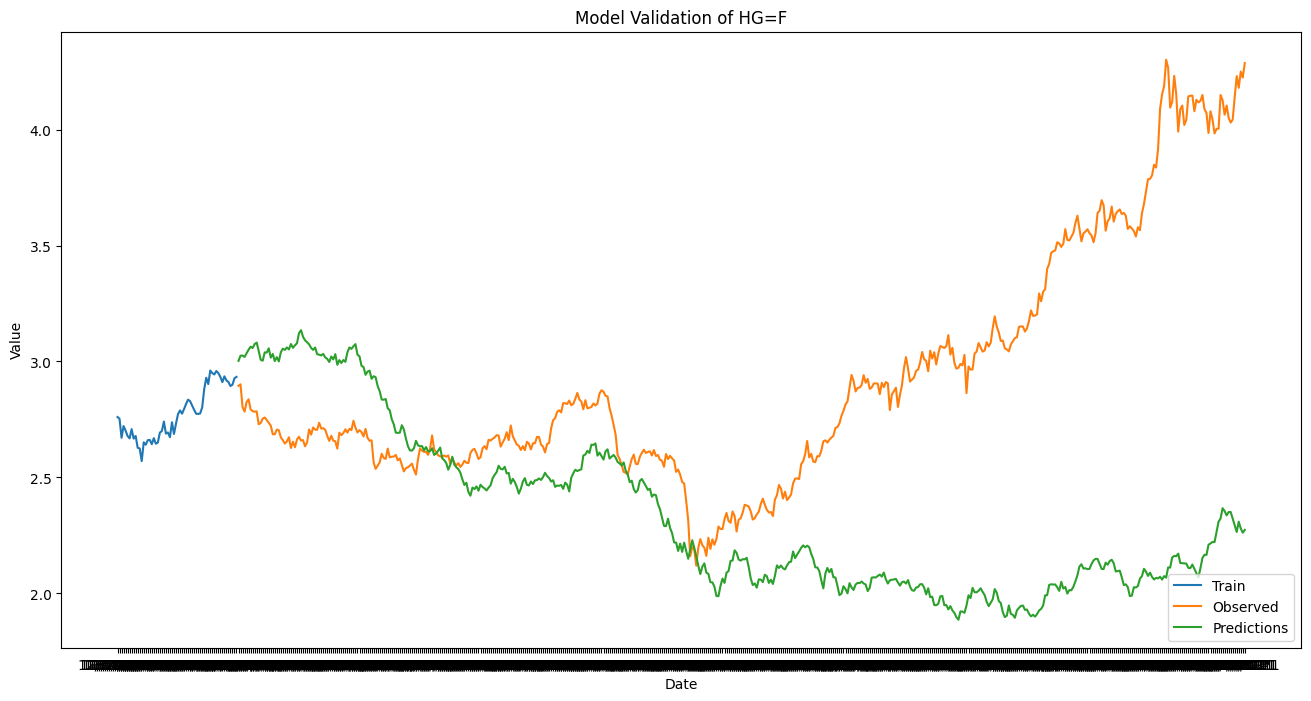

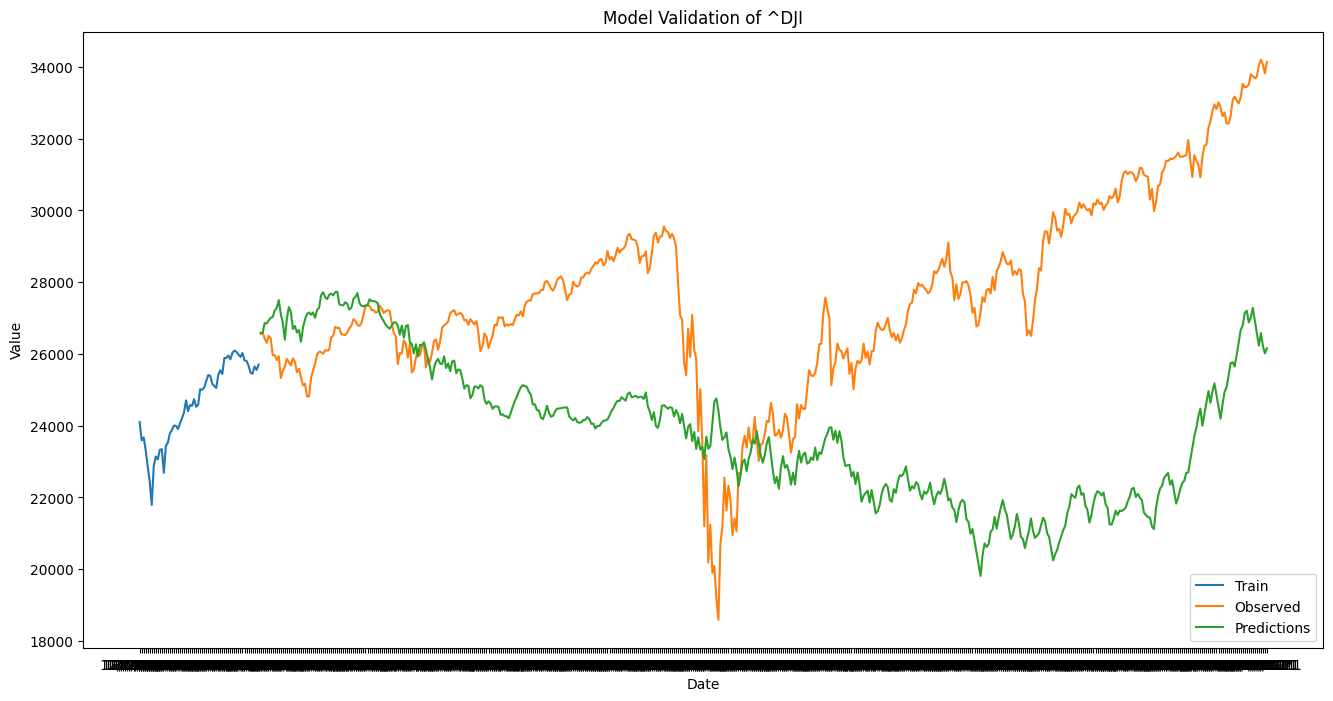

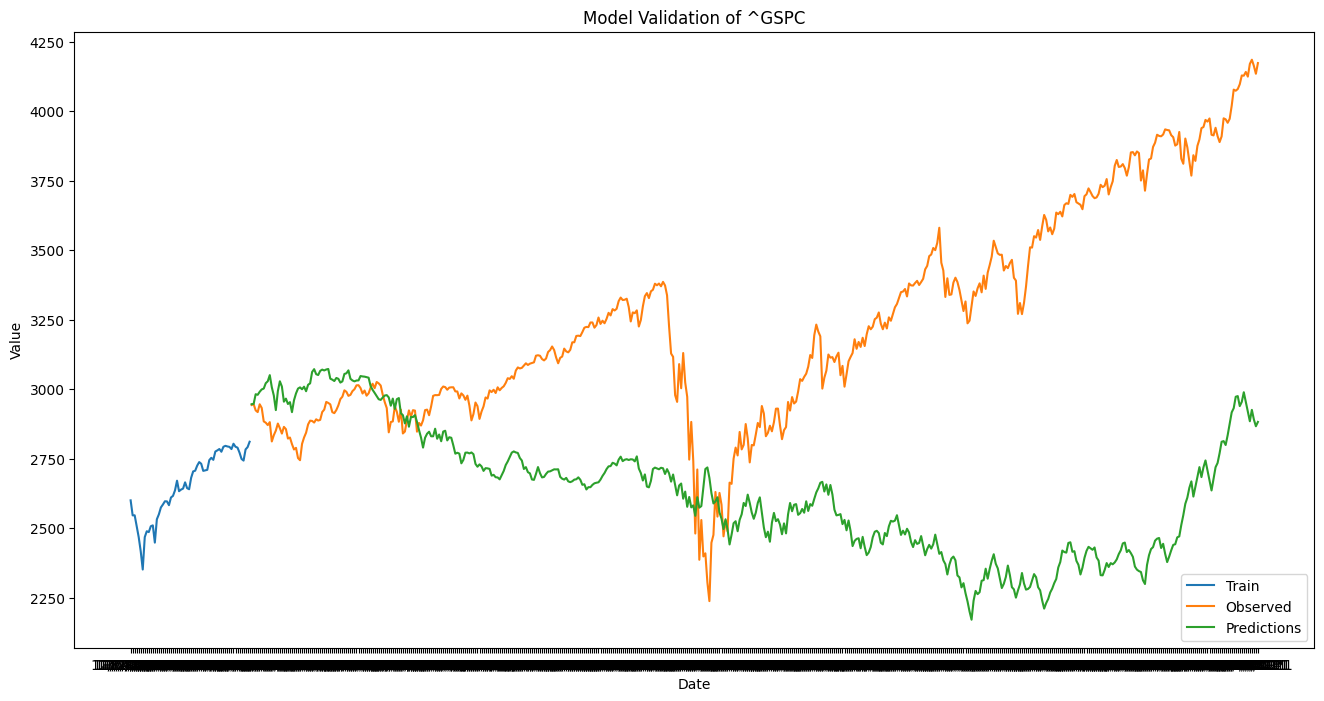

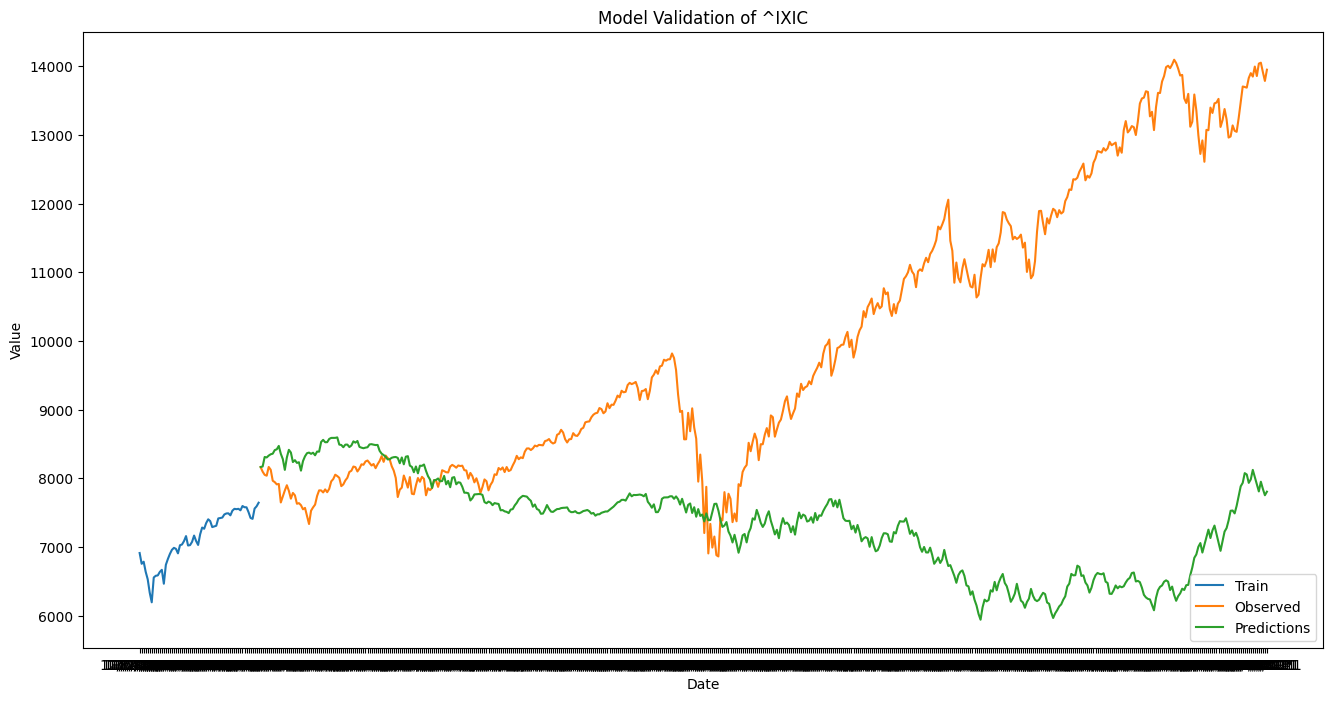

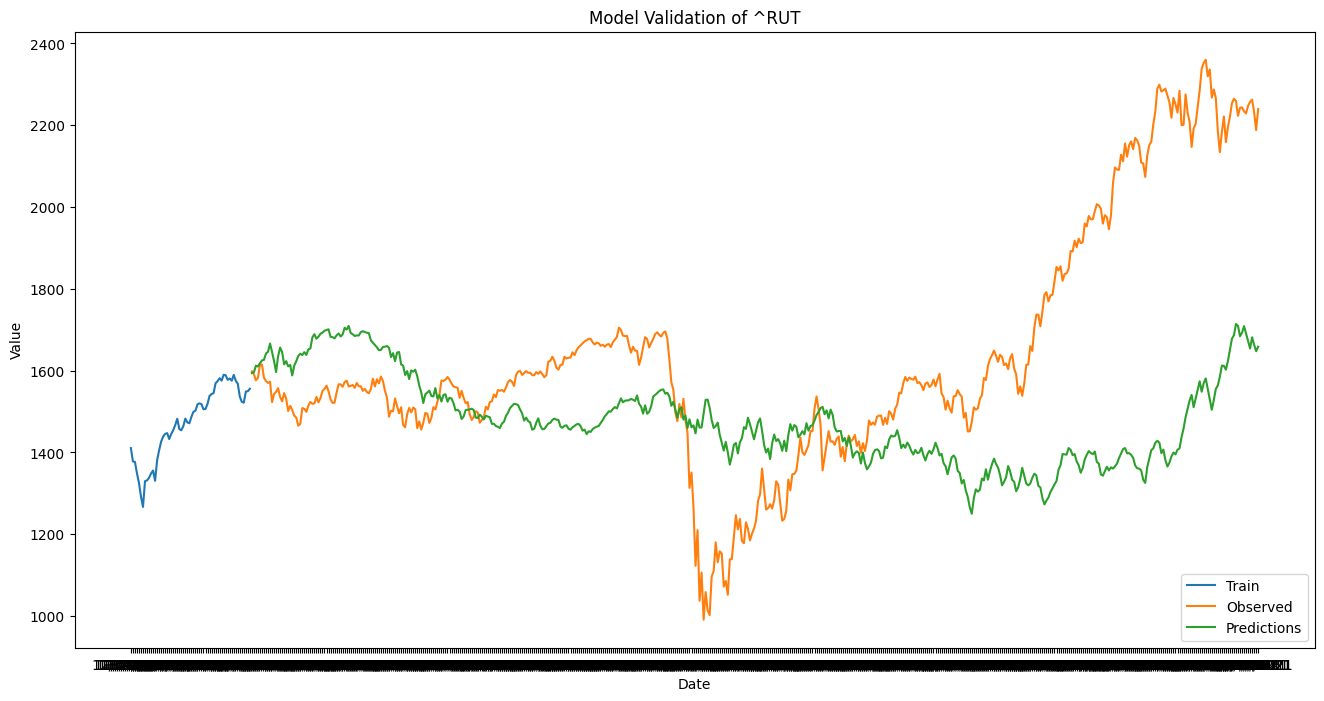

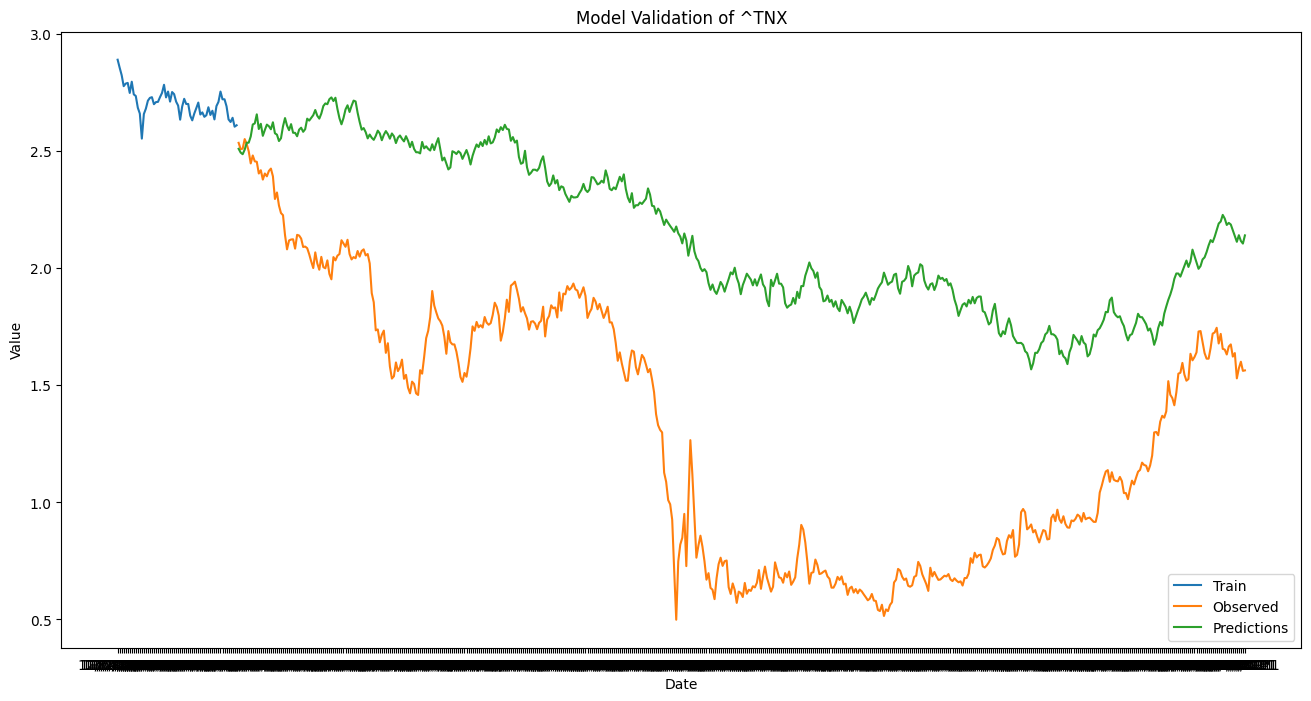

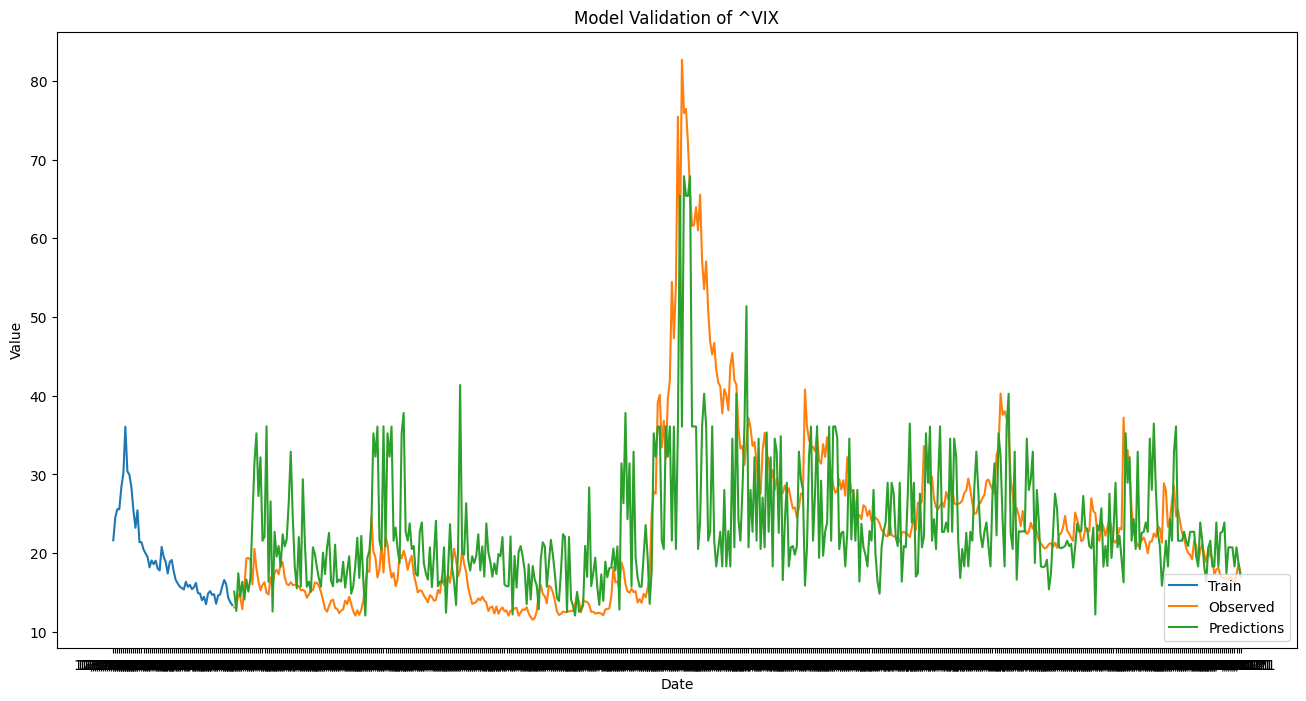

In [20]:
forecast_original_space = prediction_models('dt',x_train,y_train,x_test) 
for col in forecast_original_space.columns:
    val = validation_plot(col, prediction_window=500, model_lags=30)

In [ ]:
forecast_original_space = prediction_models('rf',x_train,y_train,x_test) 
for col in forecast_original_space.columns:
    val = validation_plot(col, prediction_window=500, model_lags=30)

In [57]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR

# Generate sample data
np.random.seed(42)
data = {
    'series1': np.random.randn(200).cumsum(),
    'series2': np.random.randn(200).cumsum()
}
df = pd.DataFrame(data)

# Split the data into training and testing
train_size = int(0.8 * len(df))
train, test = df[0:train_size], df[train_size:]

# Apply differencing to make the series stationary
train_diff = train.diff().dropna()

# Fit a VAR model on the differenced training data
model = VAR(train_diff)
model_fitted = model.fit(1)  # Using a lag of 1 for simplicity

# Forecast using the VAR model on the test data
forecast_diff = model_fitted.forecast(train_diff.values, steps=len(test))

# Convert the differenced forecast back to the original space
forecast_original_space = pd.DataFrame(forecast_diff, columns=df.columns, index=test.index)
forecast_original_space = forecast_original_space.cumsum() + train.iloc[-1]

# Compare with the test data (just printing the first few rows for brevity)
print("Test Data:")
print(test.head())
print("\nPredictions:")
print(forecast_original_space.head())



AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, TimeDistributed, Dense

model = Sequential()
# Assuming the input shape to the model is (timesteps, features)
model.add(SimpleRNN(50, return_sequences=True, input_shape=(30, 9)))
# For example: 30 timesteps, 9 features
model.add(TimeDistributed(Dense(9))) 
# Apply Dense layer independently to each of the 30 timesteps

model.compile(optimizer='adam', loss='mse')
